In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path_populacao = 'https://github.com/StefanyFernandes675/AnaliseDadosArtigo2/raw/main/dados-populacao-2017-2021.csv'
df_populacao = pd.read_csv(path_populacao, encoding='latin-1', delimiter=';')
df_populacao

,Município,2017,2018,2019,2020,2021
0,350010 ADAMANTINA,35139.0,35023.0,35068.0,35111.0,35153.0
1,350020 ADOLFO,3609.0,3571.0,3562.0,3554.0,3545.0
2,350030 AGUAI,35508.0,35954.0,36305.0,36648.0,36981.0
3,350040 AGUAS DA PRATA,8104.0,8137.0,8180.0,8221.0,8262.0
4,350050 AGUAS DE LINDOIA,18509.0,18599.0,18705.0,18808.0,18908.0
...,...,...,...,...,...,...
642,355715 ZACARIAS,2636.0,2684.0,2718.0,2752.0,2784.0
643,355720 CHAVANTES,12487.0,12418.0,12418.0,12418.0,12418.0
644,355730 ESTIVA GERBI,11067.0,11198.0,11304.0,11407.0,11507.0
645,Total,45094866.0,45538936.0,45919049.0,46289333.0,46649132.0


In [3]:
ultima_linha = df_populacao.index[-1]
penultima_linha = df_populacao.index[-2]
df_populacao = df_populacao.drop([ultima_linha, penultima_linha])
df_populacao

,Município,2017,2018,2019,2020,2021
0,350010 ADAMANTINA,35139.0,35023.0,35068.0,35111.0,35153.0
1,350020 ADOLFO,3609.0,3571.0,3562.0,3554.0,3545.0
2,350030 AGUAI,35508.0,35954.0,36305.0,36648.0,36981.0
3,350040 AGUAS DA PRATA,8104.0,8137.0,8180.0,8221.0,8262.0
4,350050 AGUAS DE LINDOIA,18509.0,18599.0,18705.0,18808.0,18908.0
...,...,...,...,...,...,...
640,355700 VOTORANTIM,119898.0,121331.0,122480.0,123599.0,124468.0
641,355710 VOTUPORANGA,92768.0,93736.0,94547.0,95338.0,96106.0
642,355715 ZACARIAS,2636.0,2684.0,2718.0,2752.0,2784.0
643,355720 CHAVANTES,12487.0,12418.0,12418.0,12418.0,12418.0


In [4]:
df_populacao[['Código', 'Cidade']] = df_populacao['Município'].str.split(' ', 1, expand=True)
df_populacao.drop(columns=['Município', 'Código'], inplace=True)
df_populacao

<ipython-input-4-a106623c7199>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df_populacao[['Código', 'Cidade']] = df_populacao['Município'].str.split(' ', 1, expand=True)


,2017,2018,2019,2020,2021,Cidade
0,35139.0,35023.0,35068.0,35111.0,35153.0,ADAMANTINA
1,3609.0,3571.0,3562.0,3554.0,3545.0,ADOLFO
2,35508.0,35954.0,36305.0,36648.0,36981.0,AGUAI
3,8104.0,8137.0,8180.0,8221.0,8262.0,AGUAS DA PRATA
4,18509.0,18599.0,18705.0,18808.0,18908.0,AGUAS DE LINDOIA
...,...,...,...,...,...,...
640,119898.0,121331.0,122480.0,123599.0,124468.0,VOTORANTIM
641,92768.0,93736.0,94547.0,95338.0,96106.0,VOTUPORANGA
642,2636.0,2684.0,2718.0,2752.0,2784.0,ZACARIAS
643,12487.0,12418.0,12418.0,12418.0,12418.0,CHAVANTES


In [5]:
nova_ordem_colunas = ['Cidade', '2017', '2018', '2019', '2020', '2021']
df_populacao = df_populacao[nova_ordem_colunas]
df_populacao

,Cidade,2017,2018,2019,2020,2021
0,ADAMANTINA,35139.0,35023.0,35068.0,35111.0,35153.0
1,ADOLFO,3609.0,3571.0,3562.0,3554.0,3545.0
2,AGUAI,35508.0,35954.0,36305.0,36648.0,36981.0
3,AGUAS DA PRATA,8104.0,8137.0,8180.0,8221.0,8262.0
4,AGUAS DE LINDOIA,18509.0,18599.0,18705.0,18808.0,18908.0
...,...,...,...,...,...,...
640,VOTORANTIM,119898.0,121331.0,122480.0,123599.0,124468.0
641,VOTUPORANGA,92768.0,93736.0,94547.0,95338.0,96106.0
642,ZACARIAS,2636.0,2684.0,2718.0,2752.0,2784.0
643,CHAVANTES,12487.0,12418.0,12418.0,12418.0,12418.0


# Cálculo da estimativa populacional de 2022

## Cálculo da taxa de crescimento anual

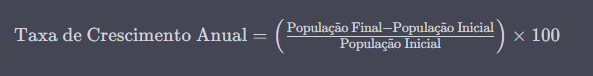

- População final: ano mais recente (2021)
- População inicial: 4 anos antes do ano mais recente (2017)

In [6]:
df_populacao_taxa = df_populacao.copy()
df_populacao_taxa['Taxa de crescimento anual'] = ((df_populacao_taxa['2021'] - df_populacao_taxa['2017']) / df_populacao_taxa['2017']) * 100
df_populacao_taxa

,Cidade,2017,2018,2019,2020,2021,Taxa de crescimento anual
0,ADAMANTINA,35139.0,35023.0,35068.0,35111.0,35153.0,0.039842
1,ADOLFO,3609.0,3571.0,3562.0,3554.0,3545.0,-1.773344
2,AGUAI,35508.0,35954.0,36305.0,36648.0,36981.0,4.148361
3,AGUAS DA PRATA,8104.0,8137.0,8180.0,8221.0,8262.0,1.949654
4,AGUAS DE LINDOIA,18509.0,18599.0,18705.0,18808.0,18908.0,2.155708
...,...,...,...,...,...,...,...
640,VOTORANTIM,119898.0,121331.0,122480.0,123599.0,124468.0,3.811573
641,VOTUPORANGA,92768.0,93736.0,94547.0,95338.0,96106.0,3.598224
642,ZACARIAS,2636.0,2684.0,2718.0,2752.0,2784.0,5.614568
643,CHAVANTES,12487.0,12418.0,12418.0,12418.0,12418.0,-0.552575


## Para estimar a população de N + 1 (2022) será feito:
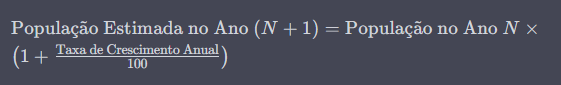

In [7]:
df_populacao_taxa['2022'] = df_populacao_taxa['2021'] * (1 + (df_populacao_taxa['Taxa de crescimento anual'] / 100))
df_populacao_taxa['2022'] = df_populacao_taxa['2022'].round()
df_populacao_taxa

,Cidade,2017,2018,2019,2020,2021,Taxa de crescimento anual,2022
0,ADAMANTINA,35139.0,35023.0,35068.0,35111.0,35153.0,0.039842,35167.0
1,ADOLFO,3609.0,3571.0,3562.0,3554.0,3545.0,-1.773344,3482.0
2,AGUAI,35508.0,35954.0,36305.0,36648.0,36981.0,4.148361,38515.0
3,AGUAS DA PRATA,8104.0,8137.0,8180.0,8221.0,8262.0,1.949654,8423.0
4,AGUAS DE LINDOIA,18509.0,18599.0,18705.0,18808.0,18908.0,2.155708,19316.0
...,...,...,...,...,...,...,...,...
640,VOTORANTIM,119898.0,121331.0,122480.0,123599.0,124468.0,3.811573,129212.0
641,VOTUPORANGA,92768.0,93736.0,94547.0,95338.0,96106.0,3.598224,99564.0
642,ZACARIAS,2636.0,2684.0,2718.0,2752.0,2784.0,5.614568,2940.0
643,CHAVANTES,12487.0,12418.0,12418.0,12418.0,12418.0,-0.552575,12349.0


In [8]:
df_estimativa_populacao = df_populacao_taxa.copy()
df_estimativa_populacao.drop(columns='Taxa de crescimento anual', inplace=True)
df_estimativa_populacao

,Cidade,2017,2018,2019,2020,2021,2022
0,ADAMANTINA,35139.0,35023.0,35068.0,35111.0,35153.0,35167.0
1,ADOLFO,3609.0,3571.0,3562.0,3554.0,3545.0,3482.0
2,AGUAI,35508.0,35954.0,36305.0,36648.0,36981.0,38515.0
3,AGUAS DA PRATA,8104.0,8137.0,8180.0,8221.0,8262.0,8423.0
4,AGUAS DE LINDOIA,18509.0,18599.0,18705.0,18808.0,18908.0,19316.0
...,...,...,...,...,...,...,...
640,VOTORANTIM,119898.0,121331.0,122480.0,123599.0,124468.0,129212.0
641,VOTUPORANGA,92768.0,93736.0,94547.0,95338.0,96106.0,99564.0
642,ZACARIAS,2636.0,2684.0,2718.0,2752.0,2784.0,2940.0
643,CHAVANTES,12487.0,12418.0,12418.0,12418.0,12418.0,12349.0


# Formatando os nomes dos municípios

In [9]:
path_furto_veiculos = 'https://github.com/StefanyFernandes675/AnaliseDadosArtigo2/raw/main/df_furtos_veiculos_2017_2022.csv'
path_furto_celulares = 'https://github.com/StefanyFernandes675/AnaliseDadosArtigo2/raw/main/df_furtos_celulares_2017_2022.csv'
path_roubo_celulares = 'https://github.com/StefanyFernandes675/AnaliseDadosArtigo2/raw/main/df_roubos_celulares.csv'
path_roubo_veiculos = 'https://github.com/StefanyFernandes675/AnaliseDadosArtigo2/raw/main/df_roubos_veiculos.csv'
path_homicidio_doloso = 'https://github.com/StefanyFernandes675/AnaliseDadosArtigo2/raw/main/df_homicidios_2017-2022.xlsx'
df_furtos_veiculos = pd.read_csv(path_furto_veiculos, encoding='latin-1')
df_furtos_celulares = pd.read_csv(path_furto_celulares, encoding='latin-1')
df_roubo_celulares = pd.read_csv(path_roubo_celulares, encoding='latin-1')
df_roubo_veiculos = pd.read_csv(path_roubo_veiculos, encoding='latin-1')
df_homicidio_doloso = pd.read_excel(path_homicidio_doloso)

In [10]:
df_furtos_celulares['CIDADE'].unique()

array(['BARUERI', 'S.PAULO', 'GUARUJA', 'SOROCABA', 'S.BERNARDO DO CAMPO',
       'MAUA', 'S.ANDRE', 'SUMARE', 'ITU', 'MOGI DAS CRUZES', 'OSASCO',
       'PIRACICABA', 'GARCA', 'POA', 'PRAIA GRANDE', 'PILAR DO SUL',
       'FRANCA', 'ARACATUBA', 'DIADEMA', 'PAULINIA', 'ITUVERAVA',
       'RIBEIRAO PRETO', 'PIRASSUNUNGA', 'RIO DAS PEDRAS', 'ANGATUBA',
       'CORDEIROPOLIS', 'S.JOSE DO RIO PRETO', 'IPUA', 'GUARULHOS',
       'APARECIDA', 'CAMPINAS', 'S.MIGUEL ARCANJO', 'VOTORANTIM',
       'SANTOS', 'MAIRINQUE', 'JUNDIAI', 'JACAREI', 'ITAQUAQUECETUBA',
       'ITAOCA', 'ITAPECERICA DA SERRA', 'CAPAO BONITO', 'LIMEIRA',
       'FRANCO DA ROCHA', 'TATUI', 'BARRA BONITA', 'BOITUVA', 'LINS',
       'S.CARLOS', 'TAUBATE', 'JARDINOPOLIS', 'COTIA', 'PONGAI',
       'MARILIA', 'S.ANTONIO DE POSSE', 'VALENTIM GENTIL', 'ITATIBA',
       'UBATUBA', 'ILHABELA', 'BOA ESPERANCA DO SUL', 'ASSIS', 'BIRIGUI',
       'TAQUARITUBA', 'HORTOLANDIA', 'PERUIBE', 'CACAPAVA', 'S.VICENTE',
       'S.CRUZ DO RIO 

In [11]:
prefixos_para_substituir = ['SAO ', 'SANTO ', 'SANTA ']

for prefixo in prefixos_para_substituir:
    df_estimativa_populacao['Cidade'] = df_estimativa_populacao['Cidade'].str.replace(f'^{prefixo}', 'S.')

df_estimativa_populacao['Cidade'] = df_estimativa_populacao['Cidade'].str.replace('PIRAPORA DO BOM JESUS', 'PIRAPORA BOM JESUS')
df_estimativa_populacao['Cidade'] = df_estimativa_populacao['Cidade'].str.replace('S.ANTONIO DO ARACANGUA', 'S.ANTONIO DE ARACANGUA')
df_estimativa_populacao['Cidade'] = df_estimativa_populacao['Cidade'].str.replace('S.RITA DO PASSA QUATRO', 'S.RITA PASSA QUATRO')
df_estimativa_populacao['Cidade'] = df_estimativa_populacao['Cidade'].str.replace('CAMPINA DO MONTE ALEGRE', 'CAMPINA MONTE ALEGRE')
df_estimativa_populacao['Cidade'] = df_estimativa_populacao['Cidade'].str.replace('EUCLIDES DA CUNHA PAULISTA', 'EUCLIDES DA CUNHA PTA')
df_estimativa_populacao['Cidade'] = df_estimativa_populacao['Cidade'].str.replace('ESPIRITO SANTO DO TURVO', 'ESPIRITO S.DO TURVO')
df_estimativa_populacao['Cidade'] = df_estimativa_populacao['Cidade'].str.replace('ESPIRITO SANTO DO PINHAL', 'ESPIRITO STO. PINHAL')
df_estimativa_populacao['Cidade'] = df_estimativa_populacao['Cidade'].str.replace('MIRANTE DO PARANAPANEMA', 'MIRANTE PARANAPANEMA')
df_estimativa_populacao['Cidade'] = df_estimativa_populacao['Cidade'].str.replace('S.JOAO DAS DUAS PONTES', 'S.JOAO DUAS PONTES')
df_estimativa_populacao['Cidade'] = df_estimativa_populacao['Cidade'].str.replace("D'OESTE", 'D OESTE')

<ipython-input-11-57cc14dd966c>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_estimativa_populacao['Cidade'] = df_estimativa_populacao['Cidade'].str.replace(f'^{prefixo}', 'S.')
<ipython-input-11-57cc14dd966c>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df_estimativa_populacao['Cidade'] = df_estimativa_populacao['Cidade'].str.replace('S.ANTONIO DO ARACANGUA', 'S.ANTONIO DE ARACANGUA')
<ipython-input-11-57cc14dd966c>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df_estimativa_populacao['Cidade'] = df_estimativa_populacao['Cidade'].str.replace('S.RITA DO PASSA QUATRO', 'S.RITA PASSA QUATRO')
<ipython-input-11-57cc14dd966c>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df_estimativa_populacao['Cidade'] = df_estimativa_populacao['Cidade'].str.replace('S.JOAO DAS DUAS PONTES',

## Furto de celulares

In [12]:
df_furtos_celulares['CIDADE'] = df_furtos_celulares['CIDADE'].str.replace('MOGI-GUACU', 'MOGI GUACU')
df_furtos_celulares['CIDADE'] = df_furtos_celulares['CIDADE'].str.replace('MOGI-MIRIM', 'MOGI MIRIM')
df_furtos_celulares['CIDADE'] = df_furtos_celulares['CIDADE'].str.replace('EMBU', 'EMBU DAS ARTES')
df_furtos_celulares['CIDADE'] = df_furtos_celulares['CIDADE'].str.replace('EMBU DAS ARTES DAS ARTES', 'EMBU DAS ARTES')
df_furtos_celulares['CIDADE'] = df_furtos_celulares['CIDADE'].str.replace('EMBU DAS ARTES-GUACU', 'EMBU-GUACU')
df_furtos_celulares['CIDADE'] = df_furtos_celulares['CIDADE'].str.replace('PACAEMBU DAS ARTES', 'PACAEMBU')
df_furtos_celulares['CIDADE'] = df_furtos_celulares['CIDADE'].str.replace('S.LUIZ DO PARAITINGA', 'S.LUIS DO PARAITINGA')

<ipython-input-12-d393133824f4>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df_furtos_celulares['CIDADE'] = df_furtos_celulares['CIDADE'].str.replace('S.LUIZ DO PARAITINGA', 'S.LUIS DO PARAITINGA')


In [13]:
cidade_estimativa = df_estimativa_populacao['Cidade'].unique()

In [14]:
cidade_furtos_celulares = df_furtos_celulares['CIDADE'].unique()

In [15]:
cidades_nao_encontradas = []
total = 0
for i in cidade_furtos_celulares:
  if i not in cidade_estimativa:
    print(f"{i} cidade não encontrada no dataset")
    total += 1
    cidades_nao_encontradas.append(i)
print("total de cidades não encontradas no df_furtos_celulares: ", total)

total de cidades não encontradas no df_furtos_celulares:  0


## Furto de veículos

In [16]:
df_furtos_veiculos['CIDADE'] = df_furtos_veiculos['CIDADE'].str.replace('MOGI-GUACU', 'MOGI GUACU')
df_furtos_veiculos['CIDADE'] = df_furtos_veiculos['CIDADE'].str.replace('MOGI-MIRIM', 'MOGI MIRIM')
df_furtos_veiculos['CIDADE'] = df_furtos_veiculos['CIDADE'].str.replace('EMBU', 'EMBU DAS ARTES')
df_furtos_veiculos['CIDADE'] = df_furtos_veiculos['CIDADE'].str.replace('EMBU DAS ARTES DAS ARTES', 'EMBU DAS ARTES')
df_furtos_veiculos['CIDADE'] = df_furtos_veiculos['CIDADE'].str.replace('EMBU DAS ARTES-GUACU', 'EMBU-GUACU')
df_furtos_veiculos['CIDADE'] = df_furtos_veiculos['CIDADE'].str.replace('PACAEMBU DAS ARTES', 'PACAEMBU')

In [17]:
# Crie uma máscara booleana para identificar as linhas com valor '.'
mask = (df_furtos_veiculos['CIDADE'] == 'OUTRO PAIS')

# Use a máscara para eliminar as linhas correspondentes
df_furtos_veiculos = df_furtos_veiculos[~mask]
df_furtos_veiculos

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,...,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,Mês,Dia,Ano
0,2017,1603408,1603408/2017,2017-12-01 00:14:00,2017-12-01 00:14:00,30/11/2017,22:00,A NOITE,2017-11-30,2017-01-12 00:14:00,...,SP,S.PAULO,Preta,I/VW JETTA,2009,2010,AUTOMOVEL,11,30,2017
1,2017,1603292,1603292/2017,2017-12-01 00:16:00,2017-12-01 00:16:00,30/11/2017,23:00,A NOITE,2017-11-30,2017-01-12 00:16:00,...,SP,POA,Vermelho,HONDA/CG 125 FAN,2006,2007,MOTOCICLO,11,30,2017
2,2017,1603518,1603518/2017,2017-12-01 00:27:00,2017-12-01 00:27:00,30/11/2017,22:00,A NOITE,2017-11-30,2017-01-12 00:27:00,...,SP,JABOTICABAL,Preta,FORD/FIESTA 1.6 FLEX,2008,2009,AUTOMOVEL,11,30,2017
3,2017,1603527,1603527/2017,2017-12-01 00:34:00,2017-12-01 00:34:00,30/11/2017,23:00,A NOITE,2017-11-30,2017-01-12 00:34:00,...,SP,S.PAULO,Prata,HYUNDAI/TUCSON GLSB,2011,2012,CAMIONETA,11,30,2017
4,2017,1603443,1603443/2017,2017-12-01 00:35:00,2017-12-01 00:35:00,30/11/2017,19:00,A NOITE,2017-11-30,2017-01-12 00:35:00,...,SP,CAMPINAS,Prata,HONDA/FIT EX,2006,2007,AUTOMOVEL,11,30,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40929,2022,7654,7654/2022,2022-12-29 22:03:00,2022-12-29 22:03:00,29/12/2022,17:30,A TARDE,2022-12-29,2022-12-29 22:03:00,...,SP,BAURU,Prata,TOYOTA ETIOS HB X,2014,2015,AUTOMOVEL,12,29,2022
40930,2022,3394,3394/2022,2022-12-29 22:30:00,2022-12-29 22:30:00,29/12/2022,14:56,A TARDE,2022-12-29,2022-12-29 22:30:00,...,SP,JABOTICABAL,Vermelho,M.A./MASSEY-FERGUSON,2006,2007,TRATOR RODAS,12,29,2022
40931,2022,3394,3394/2022,2022-12-29 22:30:00,2022-12-29 22:30:00,29/12/2022,14:56,A TARDE,2022-12-29,2022-12-29 22:30:00,...,SP,JABOTICABAL,Vermelho,M.A./MASSEY-FERGUSON,2021,2022,TRATOR RODAS,12,29,2022
40932,2022,3394,3394/2022,2022-12-29 22:30:00,2022-12-29 22:30:00,29/12/2022,14:56,A TARDE,2022-12-29,2022-12-29 22:30:00,...,MG,BELO HORIZONTE,Branco,RENAULT/KWID ZEN 10MT,2021,2022,AUTOMOVEL,12,29,2022


In [18]:
cidade_furtos_veiculos = df_furtos_veiculos['CIDADE'].unique()
cidades_nao_encontradas = []
total = 0
for i in cidade_furtos_veiculos:
  if i not in cidade_estimativa:
    print(f"{i} cidade não encontrada no dataset")
    total += 1
    cidades_nao_encontradas.append(i)
print("total de cidades não encontradas no df_furtos_veiculos: ", total)

total de cidades não encontradas no df_furtos_veiculos:  0


## Roubo de veículos

In [19]:
df_roubo_veiculos['CIDADE'] = df_roubo_veiculos['CIDADE'].str.replace('MOGI-GUACU', 'MOGI GUACU')

In [20]:
cidade_roubo_veiculos = df_roubo_veiculos['CIDADE'].unique()
cidades_nao_encontradas = []
total = 0
for i in cidade_roubo_veiculos:
  if i not in cidade_estimativa:
    print(f"{i} cidade não encontrada no dataset")
    total += 1
    cidades_nao_encontradas.append(i)
print("total de cidades não encontradas no df_roubo_veiculos: ", total)

total de cidades não encontradas no df_roubo_veiculos:  0


## Roubo de celulares

In [21]:
df_roubo_celulares['CIDADE'] = df_roubo_celulares['CIDADE'].str.replace('MOGI-MIRIM', 'MOGI MIRIM')

In [22]:
cidade_roubo_celulares = df_roubo_celulares['CIDADE'].unique()
cidades_nao_encontradas = []
total = 0
for i in cidade_roubo_celulares:
  if i not in cidade_estimativa:
    print(f"{i} cidade não encontrada no dataset")
    total += 1
    cidades_nao_encontradas.append(i)
print("total de cidades não encontradas no df_roubo_celulares: ", total)

total de cidades não encontradas no df_roubo_celulares:  0


## Homicídio doloso

In [23]:
df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'] = df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'].str.upper()

In [24]:
prefixos_para_substituir = ['SAO ', 'SANTO ', 'SANTA ', 'SÃO ']

for prefixo in prefixos_para_substituir:
    df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'] = df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'].str.replace(f'^{prefixo}', 'S.')

df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'] = df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'].str.replace(f'É', 'E')
df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'] = df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'].str.replace(f'Ê', 'E')
df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'] = df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'].str.replace('Á', 'A')
df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'] = df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'].str.replace('Ã', 'A')
df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'] = df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'].str.replace('Â', 'A')
df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'] = df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'].str.replace('Ó', 'O')
df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'] = df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'].str.replace('Ô', 'O')
df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'] = df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'].str.replace('Õ', 'O')

df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'] = df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'].str.replace("D'OESTE", 'D OESTE')
df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'] = df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'].str.replace("Í", 'I')
df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'] = df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'].str.replace("Ú", 'U')
df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'] = df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'].str.replace("Ç", 'C')

df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'] = df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'].str.replace('PIRAPORA DO BOM JESUS', 'PIRAPORA BOM JESUS')
df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'] = df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'].str.replace('S.ANTONIO DO ARACANGUA', 'S.ANTONIO DE ARACANGUA')
df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'] = df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'].str.replace('S.RITA DO PASSA QUATRO', 'S.RITA PASSA QUATRO')
df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'] = df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'].str.replace('CAMPINA DO MONTE ALEGRE', 'CAMPINA MONTE ALEGRE')
df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'] = df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'].str.replace('ESPIRITO SANTO DO TURVO', 'ESPIRITO S.DO TURVO')
df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'] = df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'].str.replace('ESPIRITO SANTO DO PINHAL', 'ESPIRITO STO. PINHAL')
df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'] = df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'].str.replace('MIRANTE DO PARANAPANEMA', 'MIRANTE PARANAPANEMA')
df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'] = df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'].str.replace('S.JOAO DAS DUAS PONTES', 'S.JOAO DUAS PONTES')
df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'] = df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'].str.replace('BIRITIBA MIRIM', 'BIRITIBA-MIRIM')
df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'] = df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'].str.replace('S.ROSA DO VITERBO', 'S.ROSA DE VITERBO')

<ipython-input-24-a97aea19ab32>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'] = df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'].str.replace(f'^{prefixo}', 'S.')
<ipython-input-24-a97aea19ab32>:21: FutureWarning: The default value of regex will change from True to False in a future version.
  df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'] = df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'].str.replace('S.ANTONIO DO ARACANGUA', 'S.ANTONIO DE ARACANGUA')
<ipython-input-24-a97aea19ab32>:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'] = df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'].str.replace('S.RITA DO PASSA QUATRO', 'S.RITA PASSA QUATRO')
<ipython-input-24-a97aea19ab32>:27: FutureWarning: The default value of regex will change from True to False in a future version.
  df_homicidio_doloso['MUNICI

In [25]:
cidade_homicidio = df_homicidio_doloso['MUNICIPIO_CIRCUNSCRICAO'].unique()
cidades_nao_encontradas = []
total = 0
for i in cidade_homicidio:
  if i not in cidade_estimativa:
    print(f"{i} cidade não encontrada no dataset")
    total += 1
    cidades_nao_encontradas.append(i)
print("total de cidades não encontradas no df_homicidio: ", total)

total de cidades não encontradas no df_homicidio:  0


# Taxa de ocorrência dos crimes

In [26]:
df_taxa_furtos_celulares = df_furtos_celulares.groupby(['CIDADE','ANO_BO']).size().reset_index(name='Ocorrências')
df_taxa_furtos_veiculos = df_furtos_veiculos.groupby(['CIDADE', 'ANO_BO']).size().reset_index(name='Ocorrências')
df_taxa_roubo_veiculos = df_roubo_veiculos.groupby(['CIDADE', 'Ano']).size().reset_index(name='Ocorrências')
df_taxa_roubo_celulares = df_roubo_celulares.groupby(['CIDADE', 'ANO_BO']).size().reset_index(name='Ocorrências')
df_taxa_homicidio_doloso = df_homicidio_doloso.groupby(['MUNICIPIO_CIRCUNSCRICAO', 'ANO_BO']).size().reset_index(name='Ocorrências')

## Furto de celulares

In [27]:
df_taxa_furtos_celulares2017 = df_taxa_furtos_celulares.loc[df_taxa_furtos_celulares['ANO_BO'] == 2017]
df_taxa_furtos_celulares2018 = df_taxa_furtos_celulares.loc[df_taxa_furtos_celulares['ANO_BO'] == 2018]
df_taxa_furtos_celulares2019 = df_taxa_furtos_celulares.loc[df_taxa_furtos_celulares['ANO_BO'] == 2019]
df_taxa_furtos_celulares2020 = df_taxa_furtos_celulares.loc[df_taxa_furtos_celulares['ANO_BO'] == 2020]
df_taxa_furtos_celulares2021 = df_taxa_furtos_celulares.loc[df_taxa_furtos_celulares['ANO_BO'] == 2021]
df_taxa_furtos_celulares2022 = df_taxa_furtos_celulares.loc[df_taxa_furtos_celulares['ANO_BO'] == 2022]

In [28]:
df_taxa_furtos_celulares2017_merged = pd.merge(df_taxa_furtos_celulares2017, df_estimativa_populacao,
                                      left_on='CIDADE', right_on='Cidade', how='inner')
df_taxa_furtos_celulares2018_merged = pd.merge(df_taxa_furtos_celulares2018, df_estimativa_populacao,
                                      left_on='CIDADE', right_on='Cidade', how='inner')
df_taxa_furtos_celulares2019_merged = pd.merge(df_taxa_furtos_celulares2019, df_estimativa_populacao,
                                      left_on='CIDADE', right_on='Cidade', how='inner')
df_taxa_furtos_celulares2020_merged = pd.merge(df_taxa_furtos_celulares2020, df_estimativa_populacao,
                                      left_on='CIDADE', right_on='Cidade', how='inner')
df_taxa_furtos_celulares2021_merged = pd.merge(df_taxa_furtos_celulares2021, df_estimativa_populacao,
                                      left_on='CIDADE', right_on='Cidade', how='inner')
df_taxa_furtos_celulares2022_merged = pd.merge(df_taxa_furtos_celulares2022, df_estimativa_populacao,
                                      left_on='CIDADE', right_on='Cidade', how='inner')

In [29]:
df_taxa_furtos_celulares2017_merged['Taxa ocorrência'] = (df_taxa_furtos_celulares2017_merged['Ocorrências']/df_taxa_furtos_celulares2017_merged['2017'])* 1000
df_taxa_furtos_celulares2018_merged['Taxa ocorrência'] = (df_taxa_furtos_celulares2018_merged['Ocorrências']/df_taxa_furtos_celulares2018_merged['2018'])* 1000
df_taxa_furtos_celulares2019_merged['Taxa ocorrência'] = (df_taxa_furtos_celulares2019_merged['Ocorrências']/df_taxa_furtos_celulares2019_merged['2019'])* 1000
df_taxa_furtos_celulares2020_merged['Taxa ocorrência'] = (df_taxa_furtos_celulares2020_merged['Ocorrências']/df_taxa_furtos_celulares2020_merged['2020'])* 1000
df_taxa_furtos_celulares2021_merged['Taxa ocorrência'] = (df_taxa_furtos_celulares2021_merged['Ocorrências']/df_taxa_furtos_celulares2021_merged['2021'])* 1000
df_taxa_furtos_celulares2022_merged['Taxa ocorrência'] = (df_taxa_furtos_celulares2022_merged['Ocorrências']/df_taxa_furtos_celulares2022_merged['2022'])* 1000

In [30]:
df_taxa_furtos_celulares2017_merged = df_taxa_furtos_celulares2017_merged.drop(['Cidade', 'ANO_BO' ,'2018', '2019', '2020', '2021', '2022'], axis=1)
df_taxa_furtos_celulares2018_merged = df_taxa_furtos_celulares2018_merged.drop(['Cidade', 'ANO_BO' ,'2017', '2019', '2020', '2021', '2022'], axis=1)
df_taxa_furtos_celulares2019_merged = df_taxa_furtos_celulares2019_merged.drop(['Cidade', 'ANO_BO','2017', '2018', '2020', '2021', '2022'], axis=1)
df_taxa_furtos_celulares2020_merged = df_taxa_furtos_celulares2020_merged.drop(['Cidade', 'ANO_BO', '2017', '2018', '2019', '2021', '2022'], axis=1)
df_taxa_furtos_celulares2021_merged = df_taxa_furtos_celulares2021_merged.drop(['Cidade', 'ANO_BO', '2017', '2018', '2019', '2020', '2022'], axis=1)
df_taxa_furtos_celulares2022_merged = df_taxa_furtos_celulares2022_merged.drop(['Cidade','ANO_BO', '2017', '2018', '2019', '2020', '2021'], axis=1)

### Gráfico

### 2017

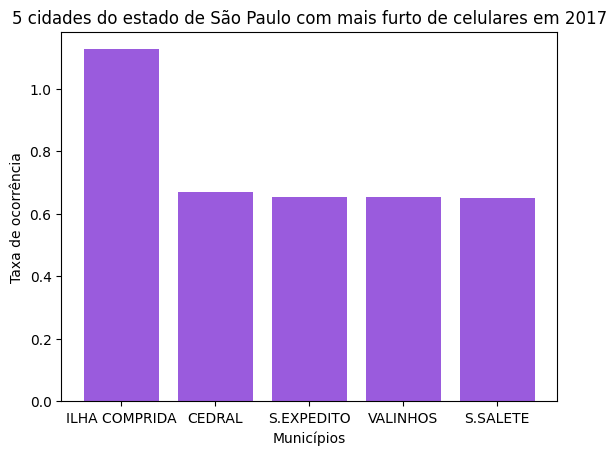

In [31]:
df_ordenado = df_taxa_furtos_celulares2017_merged.sort_values(by='Taxa ocorrência', ascending=False)

municipios = df_ordenado['CIDADE'].head()
taxa = df_ordenado['Taxa ocorrência'].head()

plt.bar(municipios, taxa, color='#9a5bdd')

# Configurações do gráfico
plt.xlabel("Municípios")
plt.ylabel("Taxa de ocorrência")
plt.title("5 cidades do estado de São Paulo com mais furto de celulares em 2017")

# Mostra o gráfico na tela
plt.show()

### 2018

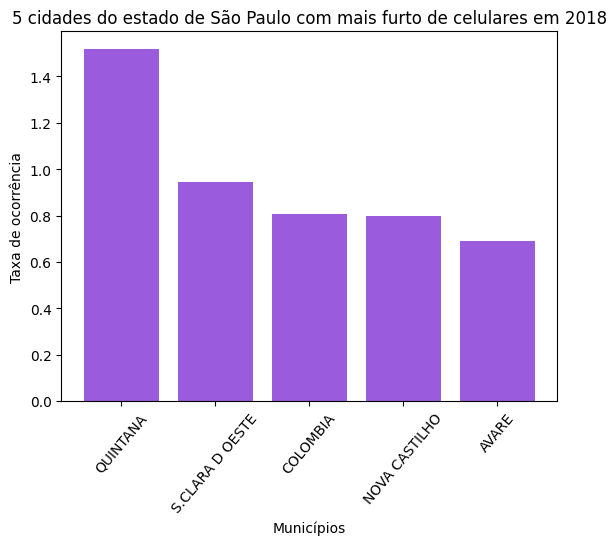

In [32]:
df_ordenado = df_taxa_furtos_celulares2018_merged.sort_values(by='Taxa ocorrência', ascending=False)

municipios = df_ordenado['CIDADE'].head()
taxa = df_ordenado['Taxa ocorrência'].head()

plt.bar(municipios, taxa, color='#9a5bdd')

# Configurações do gráfico
plt.xlabel("Municípios")
plt.ylabel("Taxa de ocorrência")
plt.title("5 cidades do estado de São Paulo com mais furto de celulares em 2018")
plt.xticks(rotation=50)

# Mostra o gráfico na tela
plt.show()

### 2019

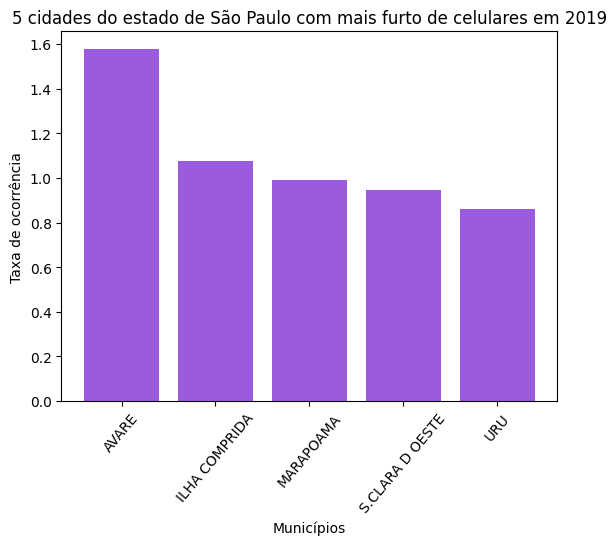

In [33]:
df_ordenado = df_taxa_furtos_celulares2019_merged.sort_values(by='Taxa ocorrência', ascending=False)

municipios = df_ordenado['CIDADE'].head()
taxa = df_ordenado['Taxa ocorrência'].head()

plt.bar(municipios, taxa, color='#9a5bdd')

# Configurações do gráfico
plt.xlabel("Municípios")
plt.ylabel("Taxa de ocorrência")
plt.title("5 cidades do estado de São Paulo com mais furto de celulares em 2019")
plt.xticks(rotation=50)

# Mostra o gráfico na tela
plt.show()

### 2020

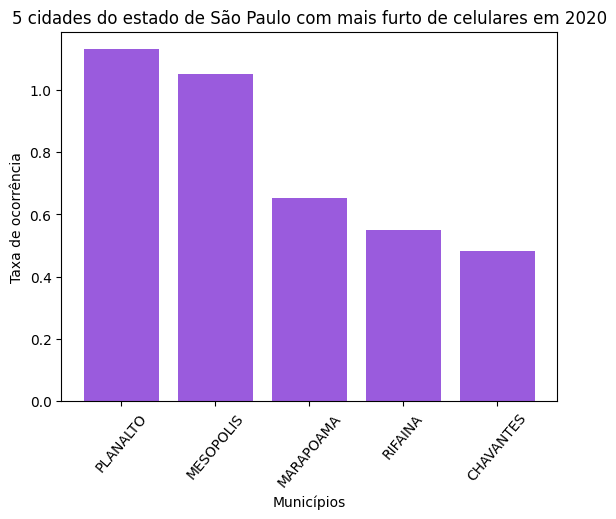

In [34]:
df_ordenado = df_taxa_furtos_celulares2020_merged.sort_values(by='Taxa ocorrência', ascending=False)

municipios = df_ordenado['CIDADE'].head()
taxa = df_ordenado['Taxa ocorrência'].head()

plt.bar(municipios, taxa, color='#9a5bdd')

# Configurações do gráfico
plt.xlabel("Municípios")
plt.ylabel("Taxa de ocorrência")
plt.title("5 cidades do estado de São Paulo com mais furto de celulares em 2020")
plt.xticks(rotation=50)

# Mostra o gráfico na tela
plt.show()

### 2021

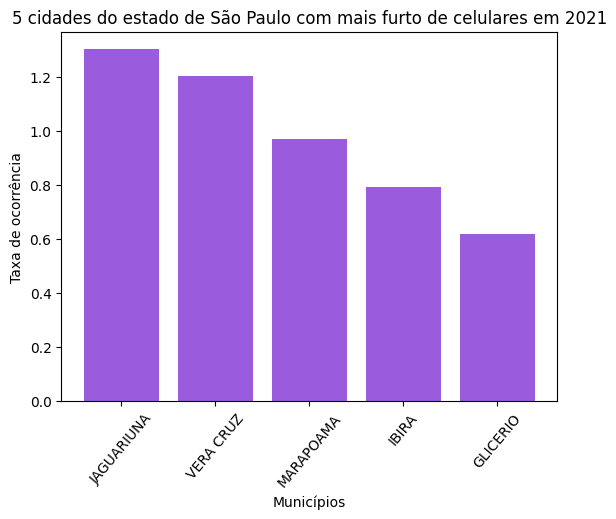

In [35]:
df_ordenado = df_taxa_furtos_celulares2021_merged.sort_values(by='Taxa ocorrência', ascending=False)

municipios = df_ordenado['CIDADE'].head()
taxa = df_ordenado['Taxa ocorrência'].head()

plt.bar(municipios, taxa, color='#9a5bdd')

# Configurações do gráfico
plt.xlabel("Municípios")
plt.ylabel("Taxa de ocorrência")
plt.title("5 cidades do estado de São Paulo com mais furto de celulares em 2021")
plt.xticks(rotation=50)

# Mostra o gráfico na tela
plt.show()

### 2022

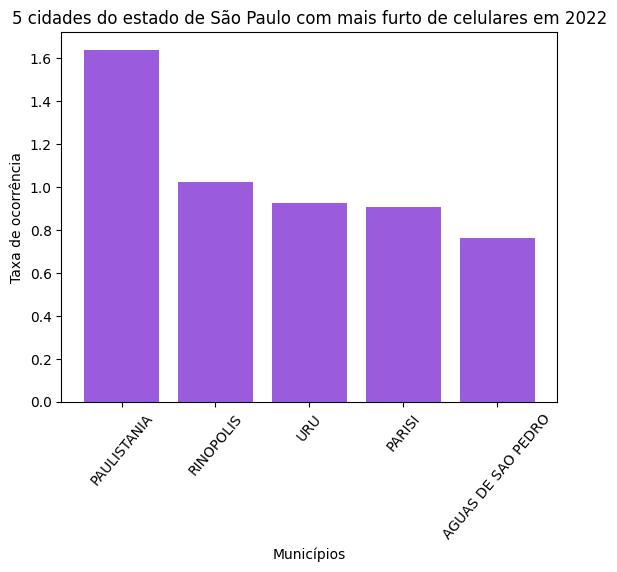

In [36]:
df_ordenado = df_taxa_furtos_celulares2022_merged.sort_values(by='Taxa ocorrência', ascending=False)

municipios = df_ordenado['CIDADE'].head()
taxa = df_ordenado['Taxa ocorrência'].head()

plt.bar(municipios, taxa, color='#9a5bdd')

# Configurações do gráfico
plt.xlabel("Municípios")
plt.ylabel("Taxa de ocorrência")
plt.title("5 cidades do estado de São Paulo com mais furto de celulares em 2022")
plt.xticks(rotation=50)

# Mostra o gráfico na tela
plt.show()

### 2017-2022

In [37]:
# Inicialize um DataFrame vazio para armazenar as somas finais
df_final = pd.DataFrame(columns=['CIDADE'])

# Defina os DataFrames de entrada em uma lista
datasets = [df_taxa_furtos_celulares2017_merged, df_taxa_furtos_celulares2018_merged, df_taxa_furtos_celulares2019_merged,
            df_taxa_furtos_celulares2020_merged, df_taxa_furtos_celulares2021_merged, df_taxa_furtos_celulares2022_merged]

# Para cada DataFrame de entrada
for i, dataset in enumerate(datasets):
    # Agrupe os dados por "Município" e some as ocorrências
    grouped = dataset.groupby('CIDADE')['Ocorrências'].sum().reset_index()

    # Adicione uma nova coluna para identificar o ano do dataset
    grouped['População'] = dataset[f'20{i+17}']  # Assume que os datasets são para os anos 2017, 2018 e 2019, 2020, 2021, 2022

    # Junte o resultado com o DataFrame final, preenchendo valores ausentes com 0
    df_final = df_final.merge(grouped, on='CIDADE', how='outer').fillna(0)

<ipython-input-37-992ba5b05dd4>:17: FutureWarning: Passing 'suffixes' which cause duplicate columns {'População_x', 'Ocorrências_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_final = df_final.merge(grouped, on='CIDADE', how='outer').fillna(0)
<ipython-input-37-992ba5b05dd4>:17: FutureWarning: Passing 'suffixes' which cause duplicate columns {'População_x', 'Ocorrências_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_final = df_final.merge(grouped, on='CIDADE', how='outer').fillna(0)


In [38]:
df_final.columns = ['CIDADE', '2017_ocorrências', '2017', '2018_ocorrências', '2018', '2019_ocorrências', '2019', '2020_ocorrências', '2020',
                    '2021_ocorrências', '2021', '2022_ocorrências', '2022']

In [39]:
df_final['Total ocorrências'] = df_final['2017_ocorrências'] + df_final['2018_ocorrências'] + df_final['2019_ocorrências'] + df_final['2020_ocorrências'] + df_final['2021_ocorrências'] + df_final['2022_ocorrências']
df_final = df_final.drop(['2017_ocorrências', '2018_ocorrências', '2019_ocorrências', '2020_ocorrências', '2021_ocorrências', '2022_ocorrências'], axis=1)
df_final = df_final.drop(['2017', '2018', '2019', '2020', '2021', '2022'], axis=1)

In [40]:
df_final = pd.merge(df_final, df_estimativa_populacao, left_on='CIDADE', right_on='Cidade', how='inner')
df_final = df_final.drop(['Cidade', '2017', '2018', '2019', '2020', '2021'], axis=1)

In [41]:
df_final['Taxa ocorrência'] = (df_final['Total ocorrências'] / df_final['2022']) * 1000

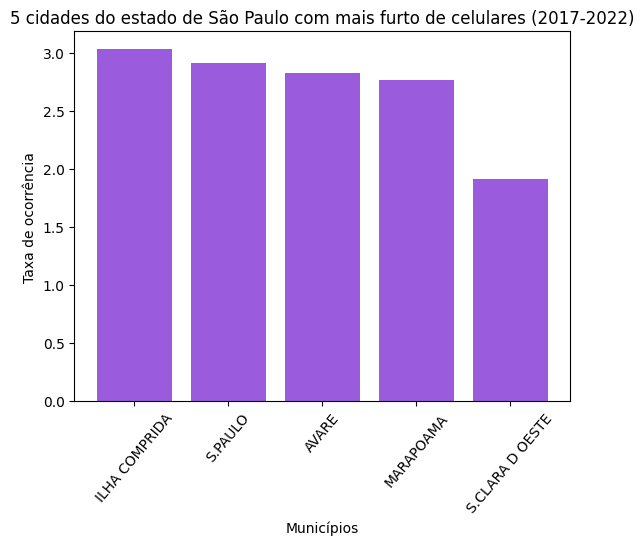

In [42]:
df_ordenado = df_final.sort_values(by='Taxa ocorrência', ascending=False)

municipios = df_ordenado['CIDADE'].head()
taxa = df_ordenado['Taxa ocorrência'].head()

plt.bar(municipios, taxa, color='#9a5bdd')

# Configurações do gráfico
plt.xlabel("Municípios")
plt.ylabel("Taxa de ocorrência")
plt.title("5 cidades do estado de São Paulo com mais furto de celulares (2017-2022)")
plt.xticks(rotation=50)

# Mostra o gráfico na tela
plt.show()

## Furto de Veículos

In [43]:
df_taxa_furtos_veiculos2017 = df_taxa_furtos_veiculos.loc[df_taxa_furtos_veiculos['ANO_BO'] == 2017]
df_taxa_furtos_veiculos2018 = df_taxa_furtos_veiculos.loc[df_taxa_furtos_veiculos['ANO_BO'] == 2018]
df_taxa_furtos_veiculos2019 = df_taxa_furtos_veiculos.loc[df_taxa_furtos_veiculos['ANO_BO'] == 2019]
df_taxa_furtos_veiculos2020 = df_taxa_furtos_veiculos.loc[df_taxa_furtos_veiculos['ANO_BO'] == 2020]
df_taxa_furtos_veiculos2021 = df_taxa_furtos_veiculos.loc[df_taxa_furtos_veiculos['ANO_BO'] == 2021]
df_taxa_furtos_veiculos2022 = df_taxa_furtos_veiculos.loc[df_taxa_furtos_veiculos['ANO_BO'] == 2022]

In [44]:
df_taxa_furtos_veiculos2017_merged = pd.merge(df_taxa_furtos_veiculos2017, df_estimativa_populacao,
                                      left_on='CIDADE', right_on='Cidade', how='inner')
df_taxa_furtos_veiculos2018_merged = pd.merge(df_taxa_furtos_veiculos2018, df_estimativa_populacao,
                                      left_on='CIDADE', right_on='Cidade', how='inner')
df_taxa_furtos_veiculos2019_merged = pd.merge(df_taxa_furtos_veiculos2019, df_estimativa_populacao,
                                      left_on='CIDADE', right_on='Cidade', how='inner')
df_taxa_furtos_veiculos2020_merged = pd.merge(df_taxa_furtos_veiculos2020, df_estimativa_populacao,
                                      left_on='CIDADE', right_on='Cidade', how='inner')
df_taxa_furtos_veiculos2021_merged = pd.merge(df_taxa_furtos_veiculos2021, df_estimativa_populacao,
                                      left_on='CIDADE', right_on='Cidade', how='inner')
df_taxa_furtos_veiculos2022_merged = pd.merge(df_taxa_furtos_veiculos2022, df_estimativa_populacao,
                                      left_on='CIDADE', right_on='Cidade', how='inner')

In [45]:
df_taxa_furtos_veiculos2017_merged['Taxa ocorrência'] = (df_taxa_furtos_veiculos2017_merged['Ocorrências']/df_taxa_furtos_veiculos2017_merged['2017'])* 1000
df_taxa_furtos_veiculos2018_merged['Taxa ocorrência'] = (df_taxa_furtos_veiculos2018_merged['Ocorrências']/df_taxa_furtos_veiculos2018_merged['2018'])* 1000
df_taxa_furtos_veiculos2019_merged['Taxa ocorrência'] = (df_taxa_furtos_veiculos2019_merged['Ocorrências']/df_taxa_furtos_veiculos2019_merged['2019'])* 1000
df_taxa_furtos_veiculos2020_merged['Taxa ocorrência'] = (df_taxa_furtos_veiculos2020_merged['Ocorrências']/df_taxa_furtos_veiculos2020_merged['2020'])* 1000
df_taxa_furtos_veiculos2021_merged['Taxa ocorrência'] = (df_taxa_furtos_veiculos2021_merged['Ocorrências']/df_taxa_furtos_veiculos2021_merged['2021'])* 1000
df_taxa_furtos_veiculos2022_merged['Taxa ocorrência'] = (df_taxa_furtos_veiculos2022_merged['Ocorrências']/df_taxa_furtos_veiculos2022_merged['2022'])* 1000

In [46]:
df_taxa_furtos_veiculos2017_merged = df_taxa_furtos_veiculos2017_merged.drop(['Cidade', 'ANO_BO' ,'2018', '2019', '2020', '2021', '2022'], axis=1)
df_taxa_furtos_veiculos2018_merged = df_taxa_furtos_veiculos2018_merged.drop(['Cidade', 'ANO_BO' ,'2017', '2019', '2020', '2021', '2022'], axis=1)
df_taxa_furtos_veiculos2019_merged = df_taxa_furtos_veiculos2019_merged.drop(['Cidade', 'ANO_BO','2017', '2018', '2020', '2021', '2022'], axis=1)
df_taxa_furtos_veiculos2020_merged = df_taxa_furtos_veiculos2020_merged.drop(['Cidade', 'ANO_BO', '2017', '2018', '2019', '2021', '2022'], axis=1)
df_taxa_furtos_veiculos2021_merged = df_taxa_furtos_veiculos2021_merged.drop(['Cidade', 'ANO_BO', '2017', '2018', '2019', '2020', '2022'], axis=1)
df_taxa_furtos_veiculos2022_merged = df_taxa_furtos_veiculos2022_merged.drop(['Cidade','ANO_BO', '2017', '2018', '2019', '2020', '2021'], axis=1)

### Gráfico

### 2017

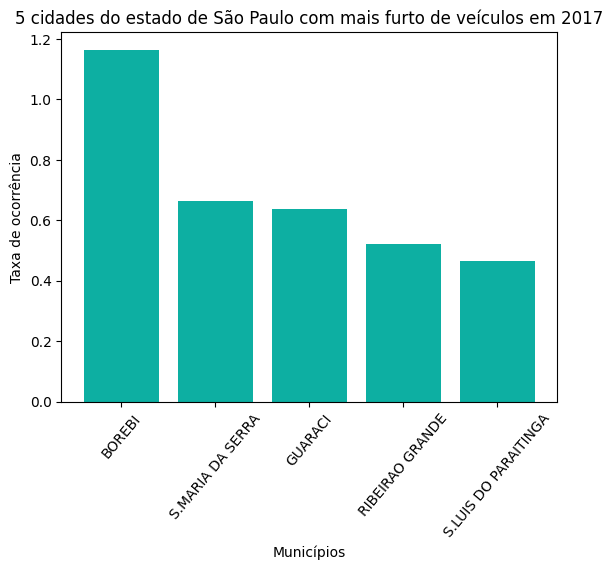

In [47]:
df_ordenado = df_taxa_furtos_veiculos2017_merged.sort_values(by='Taxa ocorrência', ascending=False)

municipios = df_ordenado['CIDADE'].head()
taxa = df_ordenado['Taxa ocorrência'].head()

plt.bar(municipios, taxa, color='#0dafa2')

# Configurações do gráfico
plt.xlabel("Municípios")
plt.ylabel("Taxa de ocorrência")
plt.title("5 cidades do estado de São Paulo com mais furto de veículos em 2017")
plt.xticks(rotation=50)

# Mostra o gráfico na tela
plt.show()

### 2018

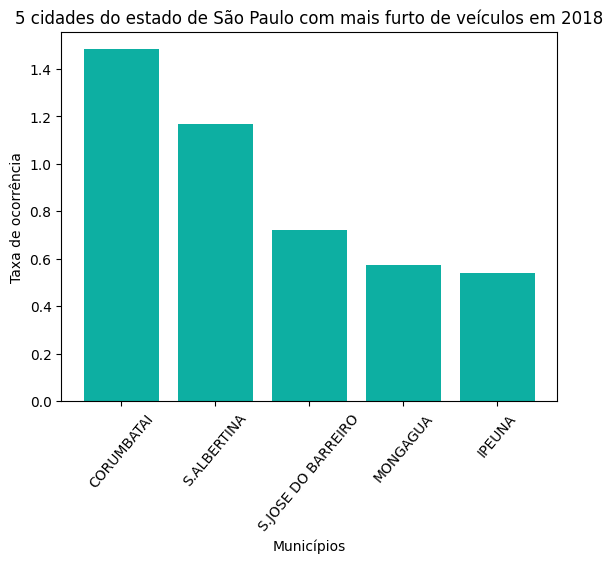

In [48]:
df_ordenado = df_taxa_furtos_veiculos2018_merged.sort_values(by='Taxa ocorrência', ascending=False)

municipios = df_ordenado['CIDADE'].head()
taxa = df_ordenado['Taxa ocorrência'].head()

plt.bar(municipios, taxa, color='#0dafa2')

# Configurações do gráfico
plt.xlabel("Municípios")
plt.ylabel("Taxa de ocorrência")
plt.title("5 cidades do estado de São Paulo com mais furto de veículos em 2018")
plt.xticks(rotation=50)

# Mostra o gráfico na tela
plt.show()

### 2019

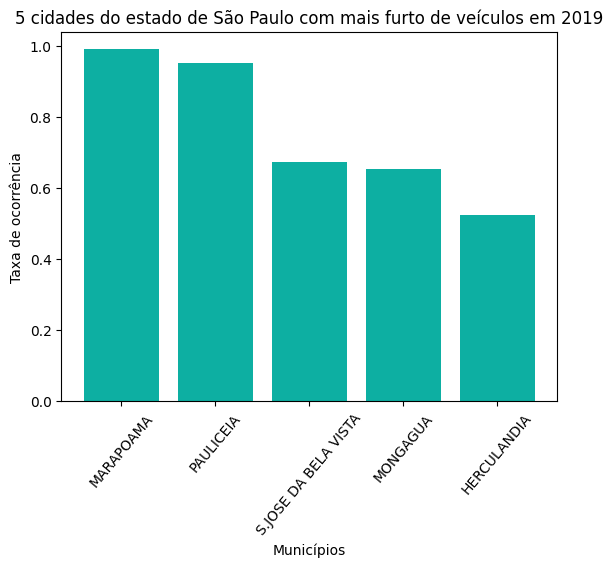

In [49]:
df_ordenado = df_taxa_furtos_veiculos2019_merged.sort_values(by='Taxa ocorrência', ascending=False)

municipios = df_ordenado['CIDADE'].head()
taxa = df_ordenado['Taxa ocorrência'].head()

plt.bar(municipios, taxa, color='#0dafa2')

# Configurações do gráfico
plt.xlabel("Municípios")
plt.ylabel("Taxa de ocorrência")
plt.title("5 cidades do estado de São Paulo com mais furto de veículos em 2019")
plt.xticks(rotation=50)

# Mostra o gráfico na tela
plt.show()

### 2020

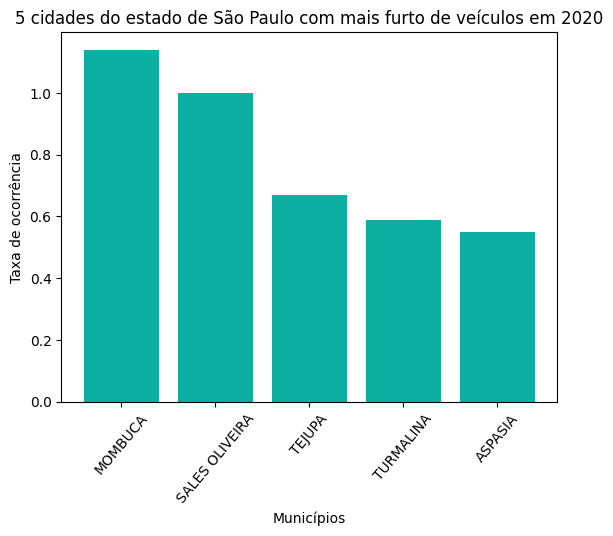

In [50]:
df_ordenado = df_taxa_furtos_veiculos2020_merged.sort_values(by='Taxa ocorrência', ascending=False)

municipios = df_ordenado['CIDADE'].head()
taxa = df_ordenado['Taxa ocorrência'].head()

plt.bar(municipios, taxa, color='#0dafa2')

# Configurações do gráfico
plt.xlabel("Municípios")
plt.ylabel("Taxa de ocorrência")
plt.title("5 cidades do estado de São Paulo com mais furto de veículos em 2020")
plt.xticks(rotation=50)

# Mostra o gráfico na tela
plt.show()

### 2021

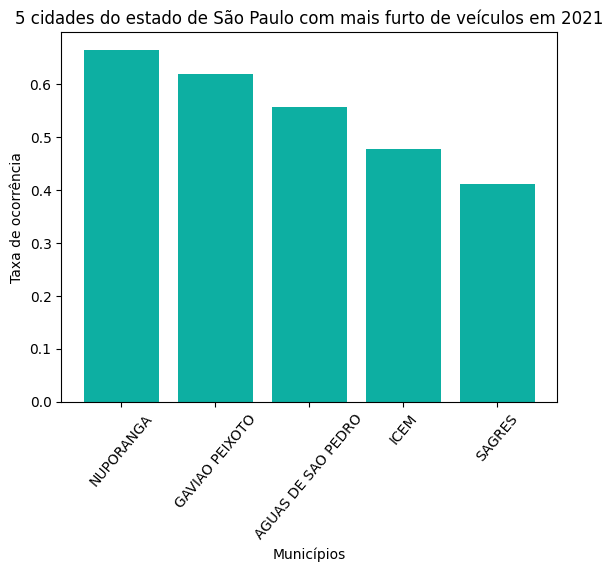

In [51]:
df_ordenado = df_taxa_furtos_veiculos2021_merged.sort_values(by='Taxa ocorrência', ascending=False)

municipios = df_ordenado['CIDADE'].head()
taxa = df_ordenado['Taxa ocorrência'].head()

plt.bar(municipios, taxa, color='#0dafa2')

# Configurações do gráfico
plt.xlabel("Municípios")
plt.ylabel("Taxa de ocorrência")
plt.title("5 cidades do estado de São Paulo com mais furto de veículos em 2021")
plt.xticks(rotation=50)

# Mostra o gráfico na tela
plt.show()

### 2022

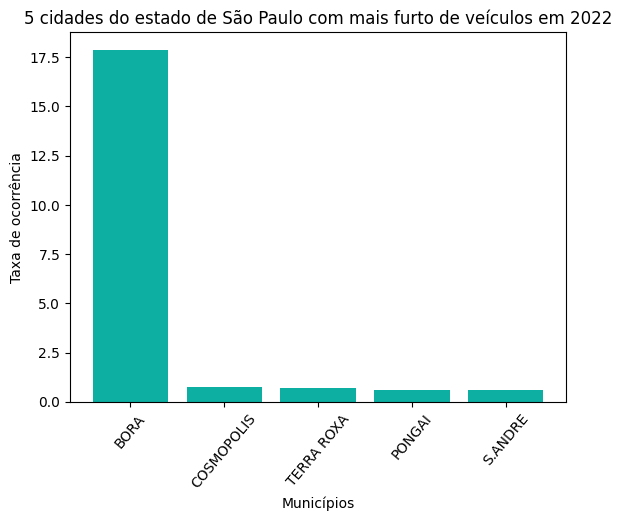

In [52]:
df_ordenado = df_taxa_furtos_veiculos2022_merged.sort_values(by='Taxa ocorrência', ascending=False)

municipios = df_ordenado['CIDADE'].head()
taxa = df_ordenado['Taxa ocorrência'].head()

plt.bar(municipios, taxa, color='#0dafa2')

# Configurações do gráfico
plt.xlabel("Municípios")
plt.ylabel("Taxa de ocorrência")
plt.title("5 cidades do estado de São Paulo com mais furto de veículos em 2022")
plt.xticks(rotation=50)

# Mostra o gráfico na tela
plt.show()

### 2017-2022

In [53]:
# Inicialize um DataFrame vazio para armazenar as somas finais
df_final = pd.DataFrame(columns=['CIDADE'])

# Defina os DataFrames de entrada em uma lista
datasets = [df_taxa_furtos_veiculos2017_merged, df_taxa_furtos_veiculos2018_merged, df_taxa_furtos_veiculos2019_merged,
            df_taxa_furtos_veiculos2020_merged, df_taxa_furtos_veiculos2021_merged, df_taxa_furtos_veiculos2022_merged]

# Para cada DataFrame de entrada
for i, dataset in enumerate(datasets):
    # Agrupe os dados por "Município" e some as ocorrências
    grouped = dataset.groupby('CIDADE')['Ocorrências'].sum().reset_index()

    # Adicione uma nova coluna para identificar o ano do dataset
    grouped['População'] = dataset[f'20{i+17}']  # Assume que os datasets são para os anos 2017, 2018 e 2019, 2020, 2021, 2022

    # Junte o resultado com o DataFrame final, preenchendo valores ausentes com 0
    df_final = df_final.merge(grouped, on='CIDADE', how='outer').fillna(0)

<ipython-input-53-a2b83c32499b>:17: FutureWarning: Passing 'suffixes' which cause duplicate columns {'População_x', 'Ocorrências_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_final = df_final.merge(grouped, on='CIDADE', how='outer').fillna(0)
<ipython-input-53-a2b83c32499b>:17: FutureWarning: Passing 'suffixes' which cause duplicate columns {'População_x', 'Ocorrências_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_final = df_final.merge(grouped, on='CIDADE', how='outer').fillna(0)


In [54]:
df_final.columns = ['CIDADE', '2017_ocorrências', '2017', '2018_ocorrências', '2018', '2019_ocorrências', '2019', '2020_ocorrências', '2020',
                    '2021_ocorrências', '2021', '2022_ocorrências', '2022']

In [55]:
df_final['Total ocorrências'] = df_final['2017_ocorrências'] + df_final['2018_ocorrências'] + df_final['2019_ocorrências'] + df_final['2020_ocorrências'] + df_final['2021_ocorrências'] + df_final['2022_ocorrências']
df_final = df_final.drop(['2017_ocorrências', '2018_ocorrências', '2019_ocorrências', '2020_ocorrências', '2021_ocorrências', '2022_ocorrências'], axis=1)
df_final = df_final.drop(['2017', '2018', '2019', '2020', '2021', '2022'], axis=1)

In [56]:
df_final = pd.merge(df_final, df_estimativa_populacao, left_on='CIDADE', right_on='Cidade', how='inner')
df_final = df_final.drop(['Cidade', '2017', '2018', '2019', '2020', '2021'], axis=1)

In [57]:
df_final['Taxa ocorrência'] = (df_final['Total ocorrências'] / df_final['2022']) * 1000

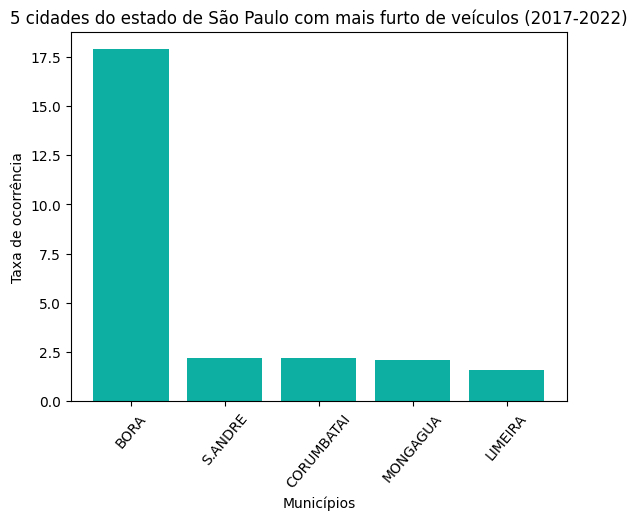

In [58]:
df_ordenado = df_final.sort_values(by='Taxa ocorrência', ascending=False)

municipios = df_ordenado['CIDADE'].head()
taxa = df_ordenado['Taxa ocorrência'].head()

plt.bar(municipios, taxa, color='#0dafa2')

# Configurações do gráfico
plt.xlabel("Municípios")
plt.ylabel("Taxa de ocorrência")
plt.title("5 cidades do estado de São Paulo com mais furto de veículos (2017-2022)")
plt.xticks(rotation=50)

# Mostra o gráfico na tela
plt.show()

## Roubo de celulares

In [59]:
df_taxa_roubo_celulares2017 = df_taxa_roubo_celulares.loc[df_taxa_roubo_celulares['ANO_BO'] == 2017]
df_taxa_roubo_celulares2018 = df_taxa_roubo_celulares.loc[df_taxa_roubo_celulares['ANO_BO'] == 2018]
df_taxa_roubo_celulares2019 = df_taxa_roubo_celulares.loc[df_taxa_roubo_celulares['ANO_BO'] == 2019]
df_taxa_roubo_celulares2020 = df_taxa_roubo_celulares.loc[df_taxa_roubo_celulares['ANO_BO'] == 2020]
df_taxa_roubo_celulares2021 = df_taxa_roubo_celulares.loc[df_taxa_roubo_celulares['ANO_BO'] == 2021]
df_taxa_roubo_celulares2022 = df_taxa_roubo_celulares.loc[df_taxa_roubo_celulares['ANO_BO'] == 2022]

In [60]:
df_taxa_roubo_celulares2017_merged = pd.merge(df_taxa_roubo_celulares2017, df_estimativa_populacao,
                                      left_on='CIDADE', right_on='Cidade', how='inner')
df_taxa_roubo_celulares2018_merged = pd.merge(df_taxa_roubo_celulares2018, df_estimativa_populacao,
                                      left_on='CIDADE', right_on='Cidade', how='inner')
df_taxa_roubo_celulares2019_merged = pd.merge(df_taxa_roubo_celulares2019, df_estimativa_populacao,
                                      left_on='CIDADE', right_on='Cidade', how='inner')
df_taxa_roubo_celulares2020_merged = pd.merge(df_taxa_roubo_celulares2020, df_estimativa_populacao,
                                      left_on='CIDADE', right_on='Cidade', how='inner')
df_taxa_roubo_celulares2021_merged = pd.merge(df_taxa_roubo_celulares2021, df_estimativa_populacao,
                                      left_on='CIDADE', right_on='Cidade', how='inner')
df_taxa_roubo_celulares2022_merged = pd.merge(df_taxa_roubo_celulares2022, df_estimativa_populacao,
                                      left_on='CIDADE', right_on='Cidade', how='inner')


In [61]:
df_taxa_roubo_celulares2017_merged['Taxa ocorrência'] = (df_taxa_roubo_celulares2017_merged['Ocorrências']/df_taxa_roubo_celulares2017_merged['2017'])* 1000
df_taxa_roubo_celulares2018_merged['Taxa ocorrência'] = (df_taxa_roubo_celulares2018_merged['Ocorrências']/df_taxa_roubo_celulares2018_merged['2018'])* 1000
df_taxa_roubo_celulares2019_merged['Taxa ocorrência'] = (df_taxa_roubo_celulares2019_merged['Ocorrências']/df_taxa_roubo_celulares2019_merged['2019'])* 1000
df_taxa_roubo_celulares2020_merged['Taxa ocorrência'] = (df_taxa_roubo_celulares2020_merged['Ocorrências']/df_taxa_roubo_celulares2020_merged['2020'])* 1000
df_taxa_roubo_celulares2021_merged['Taxa ocorrência'] = (df_taxa_roubo_celulares2021_merged['Ocorrências']/df_taxa_roubo_celulares2021_merged['2021'])* 1000
df_taxa_roubo_celulares2022_merged['Taxa ocorrência'] = (df_taxa_roubo_celulares2022_merged['Ocorrências']/df_taxa_roubo_celulares2022_merged['2022'])* 1000

In [62]:
df_taxa_roubo_celulares2017_merged = df_taxa_roubo_celulares2017_merged.drop(['Cidade', 'ANO_BO', '2018', '2019', '2020', '2021', '2022'], axis=1)
df_taxa_roubo_celulares2018_merged = df_taxa_roubo_celulares2018_merged.drop(['Cidade', 'ANO_BO' ,'2017', '2019', '2020', '2021', '2022'], axis=1)
df_taxa_roubo_celulares2019_merged = df_taxa_roubo_celulares2019_merged.drop(['Cidade', 'ANO_BO', '2017', '2018', '2020', '2021', '2022'], axis=1)
df_taxa_roubo_celulares2020_merged = df_taxa_roubo_celulares2020_merged.drop(['Cidade', 'ANO_BO', '2017', '2018', '2019', '2021', '2022'], axis=1)
df_taxa_roubo_celulares2021_merged = df_taxa_roubo_celulares2021_merged.drop(['Cidade', 'ANO_BO', '2017', '2018', '2019', '2020', '2022'], axis=1)
df_taxa_roubo_celulares2022_merged = df_taxa_roubo_celulares2022_merged.drop(['Cidade','ANO_BO', '2017', '2018', '2019', '2020', '2021'], axis=1)

### Gráficos

### 2017

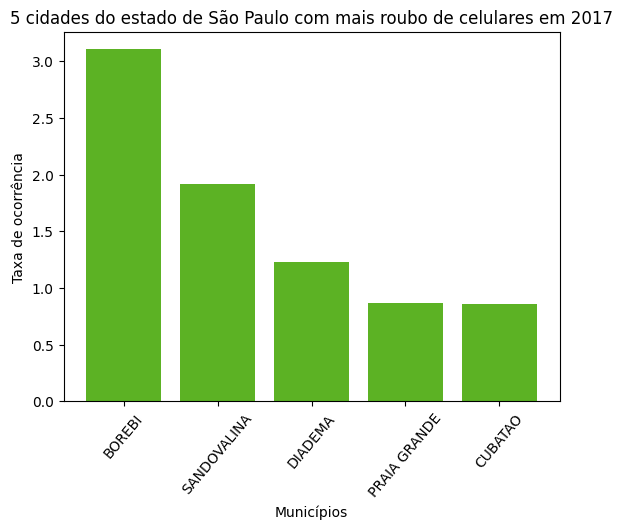

In [63]:
df_ordenado = df_taxa_roubo_celulares2017_merged.sort_values(by='Taxa ocorrência', ascending=False)

municipios = df_ordenado['CIDADE'].head()
taxa = df_ordenado['Taxa ocorrência'].head()

plt.bar(municipios, taxa, color='#5cb224')

# Configurações do gráfico
plt.xlabel("Municípios")
plt.ylabel("Taxa de ocorrência")
plt.title("5 cidades do estado de São Paulo com mais roubo de celulares em 2017")
plt.xticks(rotation=50)

# Mostra o gráfico na tela
plt.show()

### 2018

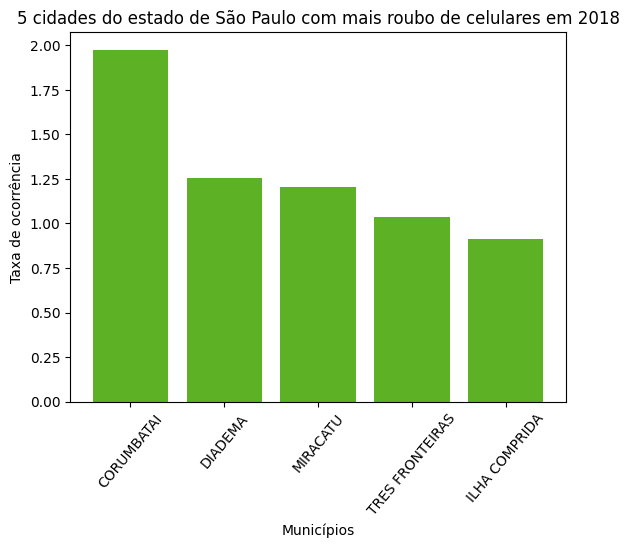

In [64]:
df_ordenado = df_taxa_roubo_celulares2018_merged.sort_values(by='Taxa ocorrência', ascending=False)

municipios = df_ordenado['CIDADE'].head()
taxa = df_ordenado['Taxa ocorrência'].head()

plt.bar(municipios, taxa, color='#5cb224')

# Configurações do gráfico
plt.xlabel("Municípios")
plt.ylabel("Taxa de ocorrência")
plt.title("5 cidades do estado de São Paulo com mais roubo de celulares em 2018")
plt.xticks(rotation=50)

# Mostra o gráfico na tela
plt.show()

### 2019

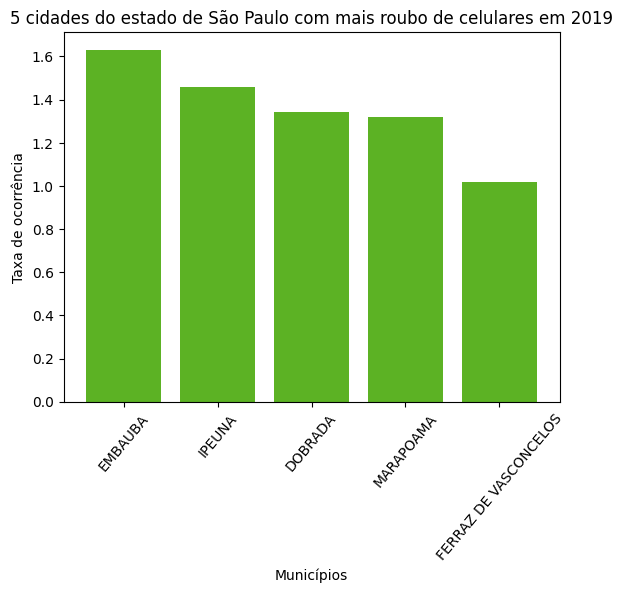

In [65]:
df_ordenado = df_taxa_roubo_celulares2019_merged.sort_values(by='Taxa ocorrência', ascending=False)

municipios = df_ordenado['CIDADE'].head()
taxa = df_ordenado['Taxa ocorrência'].head()

plt.bar(municipios, taxa, color='#5cb224')

# Configurações do gráfico
plt.xlabel("Municípios")
plt.ylabel("Taxa de ocorrência")
plt.title("5 cidades do estado de São Paulo com mais roubo de celulares em 2019")
plt.xticks(rotation=50)

# Mostra o gráfico na tela
plt.show()

### 2020

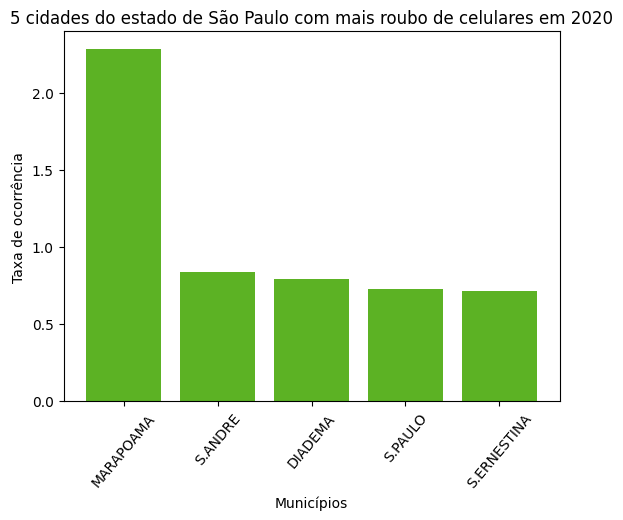

In [66]:
df_ordenado = df_taxa_roubo_celulares2020_merged.sort_values(by='Taxa ocorrência', ascending=False)

municipios = df_ordenado['CIDADE'].head()
taxa = df_ordenado['Taxa ocorrência'].head()

plt.bar(municipios, taxa, color='#5cb224')

# Configurações do gráfico
plt.xlabel("Municípios")
plt.ylabel("Taxa de ocorrência")
plt.title("5 cidades do estado de São Paulo com mais roubo de celulares em 2020")
plt.xticks(rotation=50)

# Mostra o gráfico na tela
plt.show()

### 2021

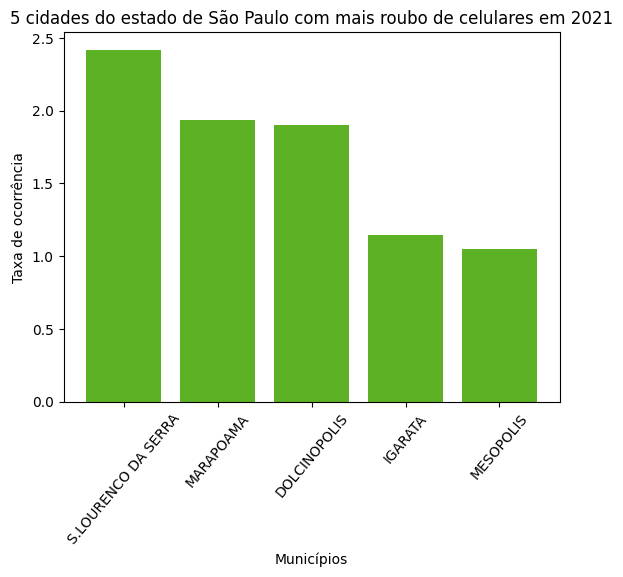

In [67]:
df_ordenado = df_taxa_roubo_celulares2021_merged.sort_values(by='Taxa ocorrência', ascending=False)

municipios = df_ordenado['CIDADE'].head()
taxa = df_ordenado['Taxa ocorrência'].head()

plt.bar(municipios, taxa, color='#5cb224')

# Configurações do gráfico
plt.xlabel("Municípios")
plt.ylabel("Taxa de ocorrência")
plt.title("5 cidades do estado de São Paulo com mais roubo de celulares em 2021")
plt.xticks(rotation=50)

# Mostra o gráfico na tela
plt.show()

### 2022

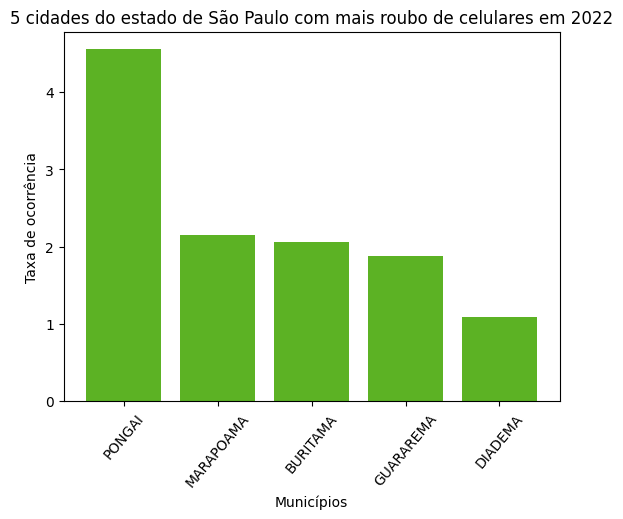

In [68]:
df_ordenado = df_taxa_roubo_celulares2022_merged.sort_values(by='Taxa ocorrência', ascending=False)

municipios = df_ordenado['CIDADE'].head()
taxa = df_ordenado['Taxa ocorrência'].head()

plt.bar(municipios, taxa, color='#5cb224')

# Configurações do gráfico
plt.xlabel("Municípios")
plt.ylabel("Taxa de ocorrência")
plt.title("5 cidades do estado de São Paulo com mais roubo de celulares em 2022")
plt.xticks(rotation=50)

# Mostra o gráfico na tela
plt.show()

### 2017-2022

In [69]:
# Inicialize um DataFrame vazio para armazenar as somas finais
df_final = pd.DataFrame(columns=['CIDADE'])

# Defina os DataFrames de entrada em uma lista
datasets = [df_taxa_roubo_celulares2017_merged, df_taxa_roubo_celulares2018_merged, df_taxa_roubo_celulares2019_merged,
            df_taxa_roubo_celulares2020_merged, df_taxa_roubo_celulares2021_merged, df_taxa_roubo_celulares2022_merged]

# Para cada DataFrame de entrada
for i, dataset in enumerate(datasets):
    # Agrupe os dados por "Município" e some as ocorrências
    grouped = dataset.groupby('CIDADE')['Ocorrências'].sum().reset_index()

    # Adicione uma nova coluna para identificar o ano do dataset
    grouped['População'] = dataset[f'20{i+17}']  # Assume que os datasets são para os anos 2017, 2018 e 2019, 2020, 2021, 2022

    # Junte o resultado com o DataFrame final, preenchendo valores ausentes com 0
    df_final = df_final.merge(grouped, on='CIDADE', how='outer').fillna(0)

<ipython-input-69-3a42bd935271>:17: FutureWarning: Passing 'suffixes' which cause duplicate columns {'População_x', 'Ocorrências_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_final = df_final.merge(grouped, on='CIDADE', how='outer').fillna(0)
<ipython-input-69-3a42bd935271>:17: FutureWarning: Passing 'suffixes' which cause duplicate columns {'População_x', 'Ocorrências_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_final = df_final.merge(grouped, on='CIDADE', how='outer').fillna(0)


In [70]:
df_final.columns = ['CIDADE', '2017_ocorrências', '2017', '2018_ocorrências', '2018', '2019_ocorrências', '2019', '2020_ocorrências', '2020',
                    '2021_ocorrências', '2021', '2022_ocorrências', '2022']

In [71]:
df_final['Total ocorrências'] = df_final['2017_ocorrências'] + df_final['2018_ocorrências'] + df_final['2019_ocorrências'] + df_final['2020_ocorrências'] + df_final['2021_ocorrências'] + df_final['2022_ocorrências']
df_final = df_final.drop(['2017_ocorrências', '2018_ocorrências', '2019_ocorrências', '2020_ocorrências', '2021_ocorrências', '2022_ocorrências'], axis=1)
df_final = df_final.drop(['2017', '2018', '2019', '2020', '2021', '2022'], axis=1)

In [72]:
df_final = pd.merge(df_final, df_estimativa_populacao, left_on='CIDADE', right_on='Cidade', how='inner')
df_final = df_final.drop(['Cidade', '2017', '2018', '2019', '2020', '2021'], axis=1)

In [73]:
df_final['Taxa ocorrência'] = (df_final['Total ocorrências'] / df_final['2022']) * 1000

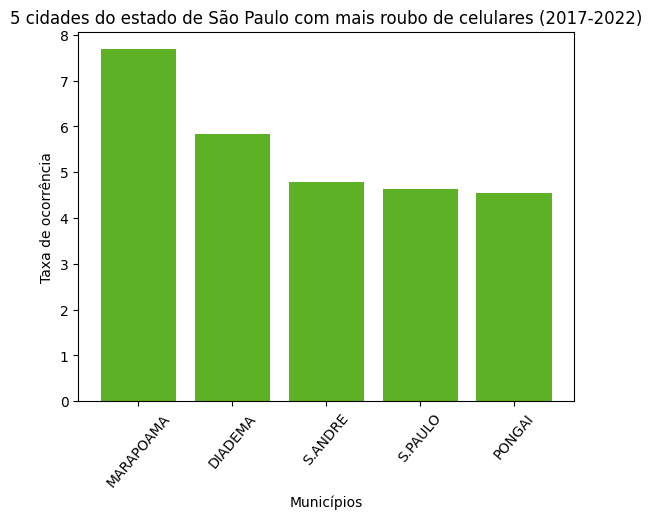

In [74]:
df_ordenado = df_final.sort_values(by='Taxa ocorrência', ascending=False)

municipios = df_ordenado['CIDADE'].head()
taxa = df_ordenado['Taxa ocorrência'].head()

plt.bar(municipios, taxa, color='#5cb224')

# Configurações do gráfico
plt.xlabel("Municípios")
plt.ylabel("Taxa de ocorrência")
plt.title("5 cidades do estado de São Paulo com mais roubo de celulares (2017-2022)")
plt.xticks(rotation=50)

# Mostra o gráfico na tela
plt.show()

## Roubo de veículos

In [75]:
df_taxa_roubo_veiculos2017 = df_taxa_roubo_veiculos.loc[df_taxa_roubo_veiculos['Ano'] == 2017]
df_taxa_roubo_veiculos2018 = df_taxa_roubo_veiculos.loc[df_taxa_roubo_veiculos['Ano'] == 2018]
df_taxa_roubo_veiculos2019 = df_taxa_roubo_veiculos.loc[df_taxa_roubo_veiculos['Ano'] == 2019]
df_taxa_roubo_veiculos2020 = df_taxa_roubo_veiculos.loc[df_taxa_roubo_veiculos['Ano'] == 2020]
df_taxa_roubo_veiculos2021 = df_taxa_roubo_veiculos.loc[df_taxa_roubo_veiculos['Ano'] == 2021]
df_taxa_roubo_veiculos2022 = df_taxa_roubo_veiculos.loc[df_taxa_roubo_veiculos['Ano'] == 2022]

In [76]:
df_taxa_roubo_veiculos2017_merged = pd.merge(df_taxa_roubo_veiculos2017, df_estimativa_populacao,
                                      left_on='CIDADE', right_on='Cidade', how='inner')
df_taxa_roubo_veiculos2018_merged = pd.merge(df_taxa_roubo_veiculos2018, df_estimativa_populacao,
                                      left_on='CIDADE', right_on='Cidade', how='inner')
df_taxa_roubo_veiculos2019_merged = pd.merge(df_taxa_roubo_veiculos2019, df_estimativa_populacao,
                                      left_on='CIDADE', right_on='Cidade', how='inner')
df_taxa_roubo_veiculos2020_merged = pd.merge(df_taxa_roubo_veiculos2020, df_estimativa_populacao,
                                      left_on='CIDADE', right_on='Cidade', how='inner')
df_taxa_roubo_veiculos2021_merged = pd.merge(df_taxa_roubo_veiculos2021, df_estimativa_populacao,
                                      left_on='CIDADE', right_on='Cidade', how='inner')
df_taxa_roubo_veiculos2022_merged = pd.merge(df_taxa_roubo_veiculos2022, df_estimativa_populacao,
                                      left_on='CIDADE', right_on='Cidade', how='inner')

In [77]:
df_taxa_roubo_veiculos2017_merged['Taxa ocorrência'] = (df_taxa_roubo_veiculos2017_merged['Ocorrências']/df_taxa_roubo_veiculos2017_merged['2017'])* 1000
df_taxa_roubo_veiculos2018_merged['Taxa ocorrência'] = (df_taxa_roubo_veiculos2018_merged['Ocorrências']/df_taxa_roubo_veiculos2018_merged['2018'])* 1000
df_taxa_roubo_veiculos2019_merged['Taxa ocorrência'] = (df_taxa_roubo_veiculos2019_merged['Ocorrências']/df_taxa_roubo_veiculos2019_merged['2019'])* 1000
df_taxa_roubo_veiculos2020_merged['Taxa ocorrência'] = (df_taxa_roubo_veiculos2020_merged['Ocorrências']/df_taxa_roubo_veiculos2020_merged['2020'])* 1000
df_taxa_roubo_veiculos2021_merged['Taxa ocorrência'] = (df_taxa_roubo_veiculos2021_merged['Ocorrências']/df_taxa_roubo_veiculos2021_merged['2021'])* 1000
df_taxa_roubo_veiculos2022_merged['Taxa ocorrência'] = (df_taxa_roubo_veiculos2022_merged['Ocorrências']/df_taxa_roubo_veiculos2022_merged['2022'])* 1000

In [78]:
df_taxa_roubo_veiculos2017_merged = df_taxa_roubo_veiculos2017_merged.drop(['Cidade', 'Ano', '2018', '2019', '2020', '2021', '2022'], axis=1)
df_taxa_roubo_veiculos2018_merged = df_taxa_roubo_veiculos2018_merged.drop(['Cidade', 'Ano' ,'2017', '2019', '2020', '2021', '2022'], axis=1)
df_taxa_roubo_veiculos2019_merged = df_taxa_roubo_veiculos2019_merged.drop(['Cidade', 'Ano', '2017', '2018', '2020', '2021', '2022'], axis=1)
df_taxa_roubo_veiculos2020_merged = df_taxa_roubo_veiculos2020_merged.drop(['Cidade', 'Ano', '2017', '2018', '2019', '2021', '2022'], axis=1)
df_taxa_roubo_veiculos2021_merged = df_taxa_roubo_veiculos2021_merged.drop(['Cidade', 'Ano', '2017', '2018', '2019', '2020', '2022'], axis=1)
df_taxa_roubo_veiculos2022_merged = df_taxa_roubo_veiculos2022_merged.drop(['Cidade','Ano', '2017', '2018', '2019', '2020', '2021'], axis=1)

### Gráficos

### 2017

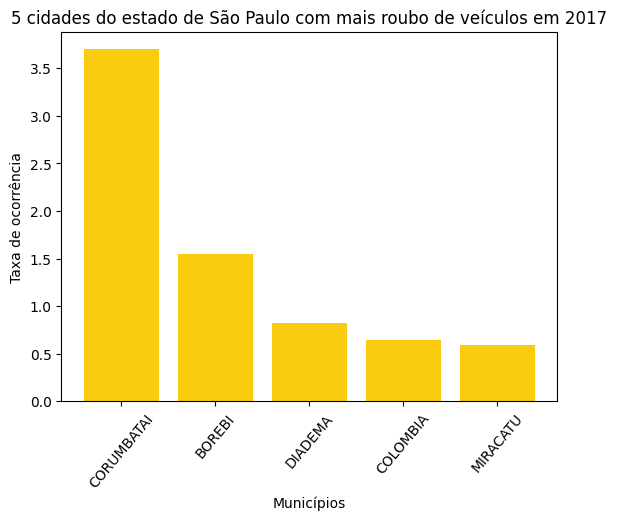

In [79]:
df_ordenado = df_taxa_roubo_veiculos2017_merged.sort_values(by='Taxa ocorrência', ascending=False)

municipios = df_ordenado['CIDADE'].head()
taxa = df_ordenado['Taxa ocorrência'].head()

plt.bar(municipios, taxa, color='#f9cc0f')

# Configurações do gráfico
plt.xlabel("Municípios")
plt.ylabel("Taxa de ocorrência")
plt.title("5 cidades do estado de São Paulo com mais roubo de veículos em 2017")
plt.xticks(rotation=50)

# Mostra o gráfico na tela
plt.show()

### 2018

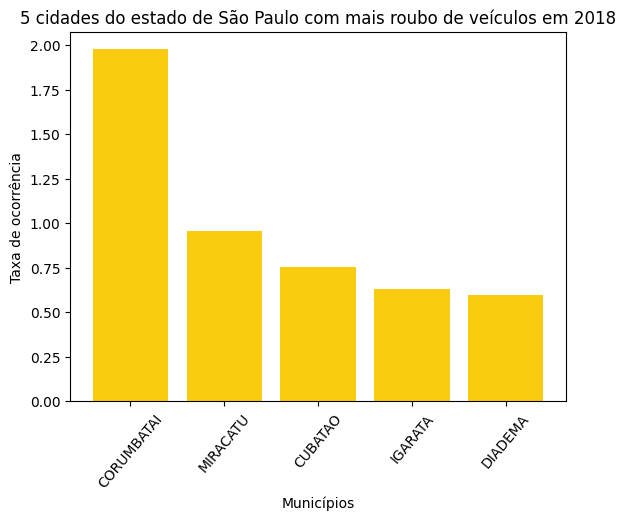

In [80]:
df_ordenado = df_taxa_roubo_veiculos2018_merged.sort_values(by='Taxa ocorrência', ascending=False)

municipios = df_ordenado['CIDADE'].head()
taxa = df_ordenado['Taxa ocorrência'].head()

plt.bar(municipios, taxa, color='#f9cc0f')

# Configurações do gráfico
plt.xlabel("Municípios")
plt.ylabel("Taxa de ocorrência")
plt.title("5 cidades do estado de São Paulo com mais roubo de veículos em 2018")
plt.xticks(rotation=50)

# Mostra o gráfico na tela
plt.show()

### 2019

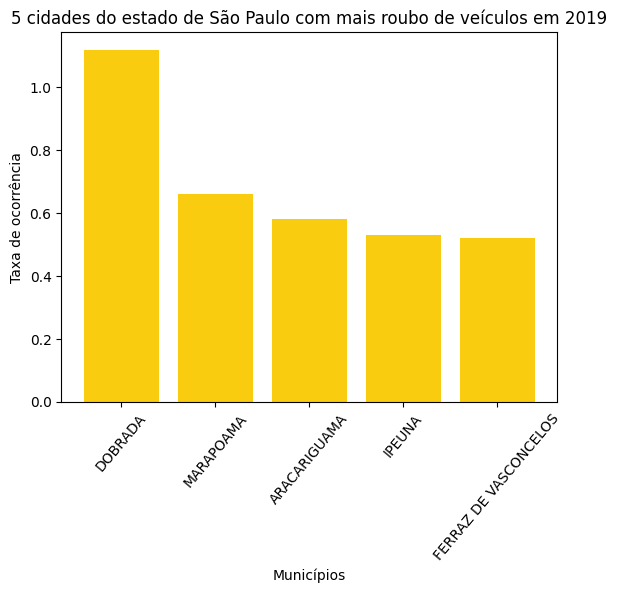

In [81]:
df_ordenado = df_taxa_roubo_veiculos2019_merged.sort_values(by='Taxa ocorrência', ascending=False)

municipios = df_ordenado['CIDADE'].head()
taxa = df_ordenado['Taxa ocorrência'].head()

plt.bar(municipios, taxa, color='#f9cc0f')

# Configurações do gráfico
plt.xlabel("Municípios")
plt.ylabel("Taxa de ocorrência")
plt.title("5 cidades do estado de São Paulo com mais roubo de veículos em 2019")
plt.xticks(rotation=50)

# Mostra o gráfico na tela
plt.show()

### 2020

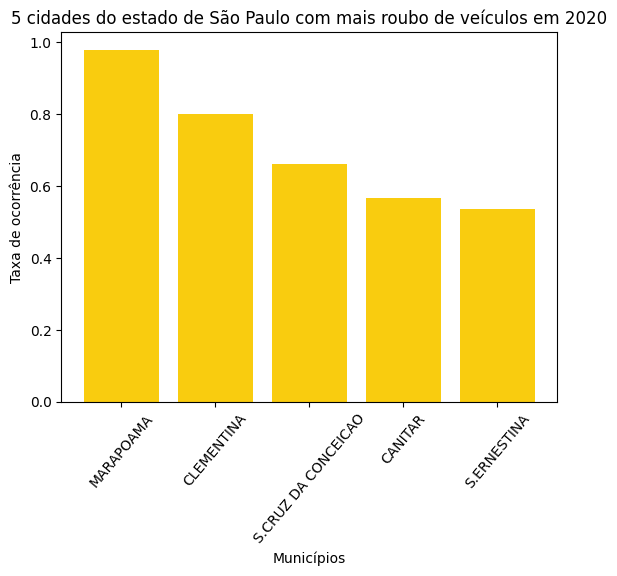

In [82]:
df_ordenado = df_taxa_roubo_veiculos2020_merged.sort_values(by='Taxa ocorrência', ascending=False)

municipios = df_ordenado['CIDADE'].head()
taxa = df_ordenado['Taxa ocorrência'].head()

plt.bar(municipios, taxa, color='#f9cc0f')

# Configurações do gráfico
plt.xlabel("Municípios")
plt.ylabel("Taxa de ocorrência")
plt.title("5 cidades do estado de São Paulo com mais roubo de veículos em 2020")
plt.xticks(rotation=50)

# Mostra o gráfico na tela
plt.show()

### 2021

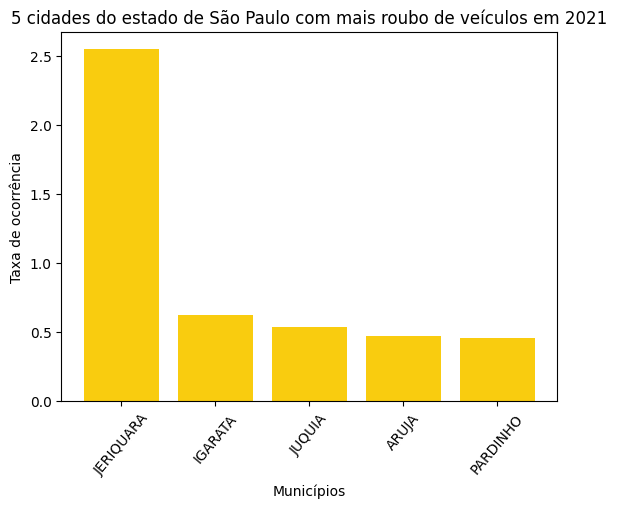

In [83]:
df_ordenado = df_taxa_roubo_veiculos2021_merged.sort_values(by='Taxa ocorrência', ascending=False)

municipios = df_ordenado['CIDADE'].head()
taxa = df_ordenado['Taxa ocorrência'].head()

plt.bar(municipios, taxa, color='#f9cc0f')

# Configurações do gráfico
plt.xlabel("Municípios")
plt.ylabel("Taxa de ocorrência")
plt.title("5 cidades do estado de São Paulo com mais roubo de veículos em 2021")
plt.xticks(rotation=50)

# Mostra o gráfico na tela
plt.show()

### 2022

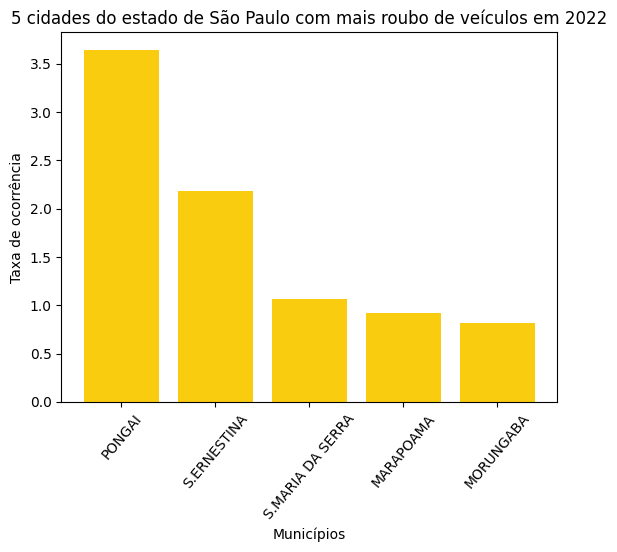

In [84]:
df_ordenado = df_taxa_roubo_veiculos2022_merged.sort_values(by='Taxa ocorrência', ascending=False)

municipios = df_ordenado['CIDADE'].head()
taxa = df_ordenado['Taxa ocorrência'].head()

plt.bar(municipios, taxa, color='#f9cc0f')

# Configurações do gráfico
plt.xlabel("Municípios")
plt.ylabel("Taxa de ocorrência")
plt.title("5 cidades do estado de São Paulo com mais roubo de veículos em 2022")
plt.xticks(rotation=50)

# Mostra o gráfico na tela
plt.show()

### 2017-2022

In [85]:
# Inicialize um DataFrame vazio para armazenar as somas finais
df_final = pd.DataFrame(columns=['CIDADE'])

# Defina os DataFrames de entrada em uma lista
datasets = [df_taxa_roubo_veiculos2017_merged, df_taxa_roubo_veiculos2018_merged, df_taxa_roubo_veiculos2019_merged,
            df_taxa_roubo_veiculos2020_merged, df_taxa_roubo_veiculos2021_merged, df_taxa_roubo_veiculos2022_merged]

# Para cada DataFrame de entrada
for i, dataset in enumerate(datasets):
    # Agrupe os dados por "Município" e some as ocorrências
    grouped = dataset.groupby('CIDADE')['Ocorrências'].sum().reset_index()

    # Adicione uma nova coluna para identificar o ano do dataset
    grouped['População'] = dataset[f'20{i+17}']  # Assume que os datasets são para os anos 2017, 2018 e 2019, 2020, 2021, 2022

    # Junte o resultado com o DataFrame final, preenchendo valores ausentes com 0
    df_final = df_final.merge(grouped, on='CIDADE', how='outer').fillna(0)

<ipython-input-85-038990fe47b9>:17: FutureWarning: Passing 'suffixes' which cause duplicate columns {'População_x', 'Ocorrências_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_final = df_final.merge(grouped, on='CIDADE', how='outer').fillna(0)
<ipython-input-85-038990fe47b9>:17: FutureWarning: Passing 'suffixes' which cause duplicate columns {'População_x', 'Ocorrências_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_final = df_final.merge(grouped, on='CIDADE', how='outer').fillna(0)


In [86]:
df_final.columns = ['CIDADE', '2017_ocorrências', '2017', '2018_ocorrências', '2018', '2019_ocorrências', '2019', '2020_ocorrências', '2020',
                    '2021_ocorrências', '2021', '2022_ocorrências', '2022']

In [87]:
df_final['Total ocorrências'] = df_final['2017_ocorrências'] + df_final['2018_ocorrências'] + df_final['2019_ocorrências'] + df_final['2020_ocorrências'] + df_final['2021_ocorrências'] + df_final['2022_ocorrências']
df_final = df_final.drop(['2017_ocorrências', '2018_ocorrências', '2019_ocorrências', '2020_ocorrências', '2021_ocorrências', '2022_ocorrências'], axis=1)
df_final = df_final.drop(['2017', '2018', '2019', '2020', '2021', '2022'], axis=1)

In [88]:
df_final = pd.merge(df_final, df_estimativa_populacao, left_on='CIDADE', right_on='Cidade', how='inner')
df_final = df_final.drop(['Cidade', '2017', '2018', '2019', '2020', '2021'], axis=1)

In [89]:
df_final['Taxa ocorrência'] = (df_final['Total ocorrências'] / df_final['2022']) * 1000

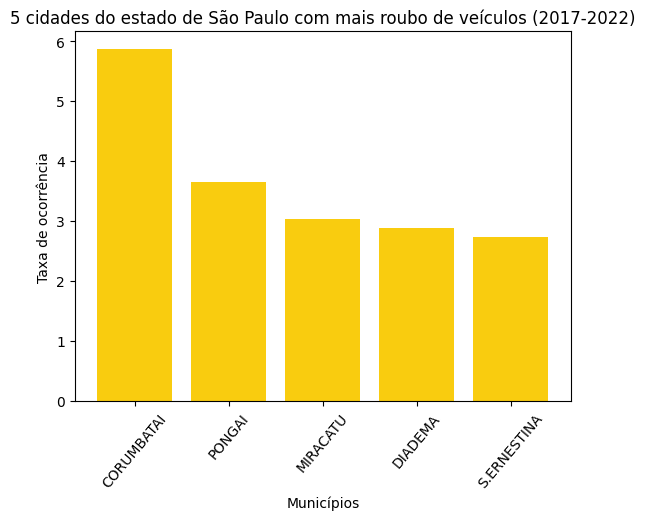

In [90]:
df_ordenado = df_final.sort_values(by='Taxa ocorrência', ascending=False)

municipios = df_ordenado['CIDADE'].head()
taxa = df_ordenado['Taxa ocorrência'].head()

plt.bar(municipios, taxa, color='#f9cc0f')

# Configurações do gráfico
plt.xlabel("Municípios")
plt.ylabel("Taxa de ocorrência")
plt.title("5 cidades do estado de São Paulo com mais roubo de veículos (2017-2022)")
plt.xticks(rotation=50)

# Mostra o gráfico na tela
plt.show()

## Homicídio doloso

In [91]:
df_taxa_homicidio_doloso2017 = df_taxa_homicidio_doloso.loc[df_taxa_homicidio_doloso['ANO_BO'] == 2017]
df_taxa_homicidio_doloso2018 = df_taxa_homicidio_doloso.loc[df_taxa_homicidio_doloso['ANO_BO'] == 2018]
df_taxa_homicidio_doloso2019 = df_taxa_homicidio_doloso.loc[df_taxa_homicidio_doloso['ANO_BO'] == 2019]
df_taxa_homicidio_doloso2020 = df_taxa_homicidio_doloso.loc[df_taxa_homicidio_doloso['ANO_BO'] == 2020]
df_taxa_homicidio_doloso2021 = df_taxa_homicidio_doloso.loc[df_taxa_homicidio_doloso['ANO_BO'] == 2021]
df_taxa_homicidio_doloso2022 = df_taxa_homicidio_doloso.loc[df_taxa_homicidio_doloso['ANO_BO'] == 2022]

In [92]:
df_taxa_homicidio_doloso2017_merged = pd.merge(df_taxa_homicidio_doloso2017, df_estimativa_populacao,
                                      left_on='MUNICIPIO_CIRCUNSCRICAO', right_on='Cidade', how='inner')
df_taxa_homicidio_doloso2018_merged = pd.merge(df_taxa_homicidio_doloso2018, df_estimativa_populacao,
                                      left_on='MUNICIPIO_CIRCUNSCRICAO', right_on='Cidade', how='inner')
df_taxa_homicidio_doloso2019_merged = pd.merge(df_taxa_homicidio_doloso2019, df_estimativa_populacao,
                                      left_on='MUNICIPIO_CIRCUNSCRICAO', right_on='Cidade', how='inner')
df_taxa_homicidio_doloso2020_merged = pd.merge(df_taxa_homicidio_doloso2020, df_estimativa_populacao,
                                      left_on='MUNICIPIO_CIRCUNSCRICAO', right_on='Cidade', how='inner')
df_taxa_homicidio_doloso2021_merged = pd.merge(df_taxa_homicidio_doloso2021, df_estimativa_populacao,
                                      left_on='MUNICIPIO_CIRCUNSCRICAO', right_on='Cidade', how='inner')
df_taxa_homicidio_doloso2022_merged = pd.merge(df_taxa_homicidio_doloso2022, df_estimativa_populacao,
                                      left_on='MUNICIPIO_CIRCUNSCRICAO', right_on='Cidade', how='inner')

In [93]:
df_taxa_homicidio_doloso2017_merged['Taxa ocorrência'] = (df_taxa_homicidio_doloso2017_merged['Ocorrências']/df_taxa_homicidio_doloso2017_merged['2017'])* 1000
df_taxa_homicidio_doloso2018_merged['Taxa ocorrência'] = (df_taxa_homicidio_doloso2018_merged['Ocorrências']/df_taxa_homicidio_doloso2018_merged['2018'])* 1000
df_taxa_homicidio_doloso2019_merged['Taxa ocorrência'] = (df_taxa_homicidio_doloso2019_merged['Ocorrências']/df_taxa_homicidio_doloso2019_merged['2019'])* 1000
df_taxa_homicidio_doloso2020_merged['Taxa ocorrência'] = (df_taxa_homicidio_doloso2020_merged['Ocorrências']/df_taxa_homicidio_doloso2020_merged['2020'])* 1000
df_taxa_homicidio_doloso2021_merged['Taxa ocorrência'] = (df_taxa_homicidio_doloso2021_merged['Ocorrências']/df_taxa_homicidio_doloso2021_merged['2021'])* 1000
df_taxa_homicidio_doloso2022_merged['Taxa ocorrência'] = (df_taxa_homicidio_doloso2022_merged['Ocorrências']/df_taxa_homicidio_doloso2022_merged['2022'])* 1000

In [94]:
df_taxa_homicidio_doloso2017_merged = df_taxa_homicidio_doloso2017_merged.drop(['Cidade', 'ANO_BO', '2018', '2019', '2020', '2021', '2022'], axis=1)
df_taxa_homicidio_doloso2018_merged = df_taxa_homicidio_doloso2018_merged.drop(['Cidade', 'ANO_BO' ,'2017', '2019', '2020', '2021', '2022'], axis=1)
df_taxa_homicidio_doloso2019_merged = df_taxa_homicidio_doloso2019_merged.drop(['Cidade', 'ANO_BO', '2017', '2018', '2020', '2021', '2022'], axis=1)
df_taxa_homicidio_doloso2020_merged = df_taxa_homicidio_doloso2020_merged.drop(['Cidade', 'ANO_BO', '2017', '2018', '2019', '2021', '2022'], axis=1)
df_taxa_homicidio_doloso2021_merged = df_taxa_homicidio_doloso2021_merged.drop(['Cidade', 'ANO_BO', '2017', '2018', '2019', '2020', '2022'], axis=1)
df_taxa_homicidio_doloso2022_merged = df_taxa_homicidio_doloso2022_merged.drop(['Cidade','ANO_BO', '2017', '2018', '2019', '2020', '2021'], axis=1)

### Gráficos

### 2017

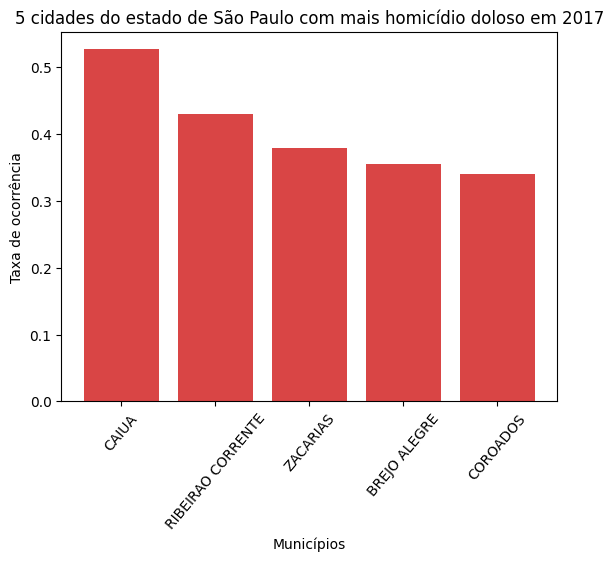

In [95]:
df_ordenado = df_taxa_homicidio_doloso2017_merged.sort_values(by='Taxa ocorrência', ascending=False)

municipios = df_ordenado['MUNICIPIO_CIRCUNSCRICAO'].head()
taxa = df_ordenado['Taxa ocorrência'].head()

plt.bar(municipios, taxa, color='#d94545')

# Configurações do gráfico
plt.xlabel("Municípios")
plt.ylabel("Taxa de ocorrência")
plt.title("5 cidades do estado de São Paulo com mais homicídio doloso em 2017")
plt.xticks(rotation=50)

# Mostra o gráfico na tela
plt.show()

### 2018

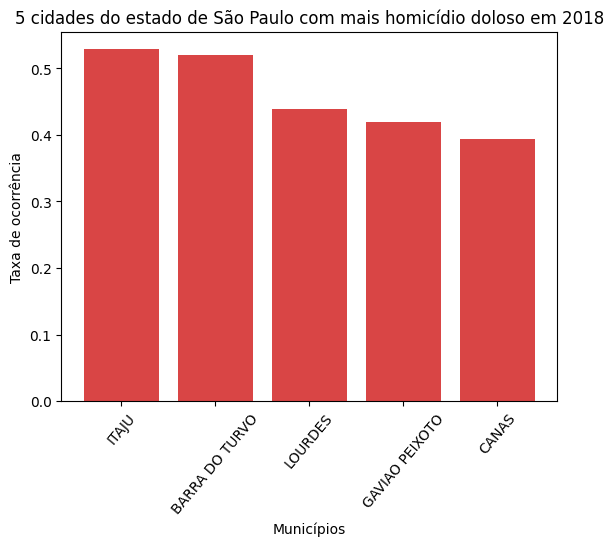

In [96]:
df_ordenado = df_taxa_homicidio_doloso2018_merged.sort_values(by='Taxa ocorrência', ascending=False)

municipios = df_ordenado['MUNICIPIO_CIRCUNSCRICAO'].head()
taxa = df_ordenado['Taxa ocorrência'].head()

plt.bar(municipios, taxa, color='#d94545')

# Configurações do gráfico
plt.xlabel("Municípios")
plt.ylabel("Taxa de ocorrência")
plt.title("5 cidades do estado de São Paulo com mais homicídio doloso em 2018")
plt.xticks(rotation=50)

# Mostra o gráfico na tela
plt.show()

### 2019

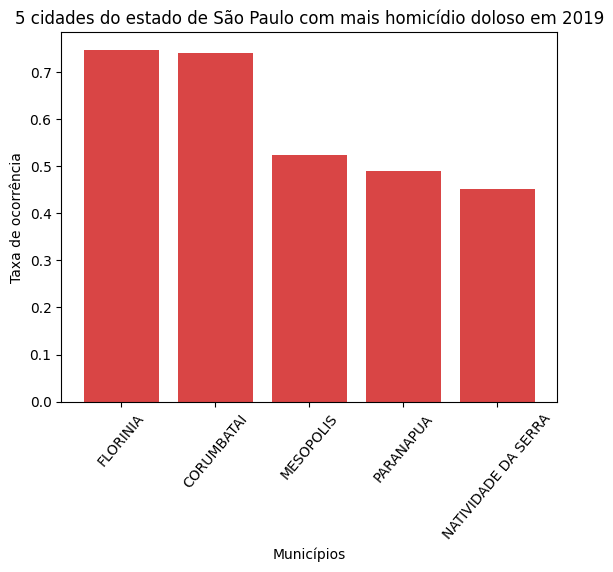

In [97]:
df_ordenado = df_taxa_homicidio_doloso2019_merged.sort_values(by='Taxa ocorrência', ascending=False)

municipios = df_ordenado['MUNICIPIO_CIRCUNSCRICAO'].head()
taxa = df_ordenado['Taxa ocorrência'].head()

plt.bar(municipios, taxa, color='#d94545')

# Configurações do gráfico
plt.xlabel("Municípios")
plt.ylabel("Taxa de ocorrência")
plt.title("5 cidades do estado de São Paulo com mais homicídio doloso em 2019")
plt.xticks(rotation=50)

# Mostra o gráfico na tela
plt.show()

### 2020

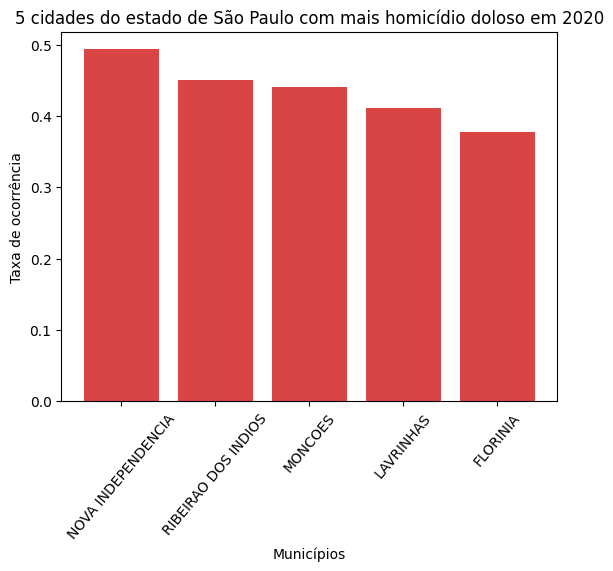

In [98]:
df_ordenado = df_taxa_homicidio_doloso2020_merged.sort_values(by='Taxa ocorrência', ascending=False)

municipios = df_ordenado['MUNICIPIO_CIRCUNSCRICAO'].head()
taxa = df_ordenado['Taxa ocorrência'].head()

plt.bar(municipios, taxa, color='#d94545')

# Configurações do gráfico
plt.xlabel("Municípios")
plt.ylabel("Taxa de ocorrência")
plt.title("5 cidades do estado de São Paulo com mais homicídio doloso em 2020")
plt.xticks(rotation=50)

# Mostra o gráfico na tela
plt.show()

### 2021

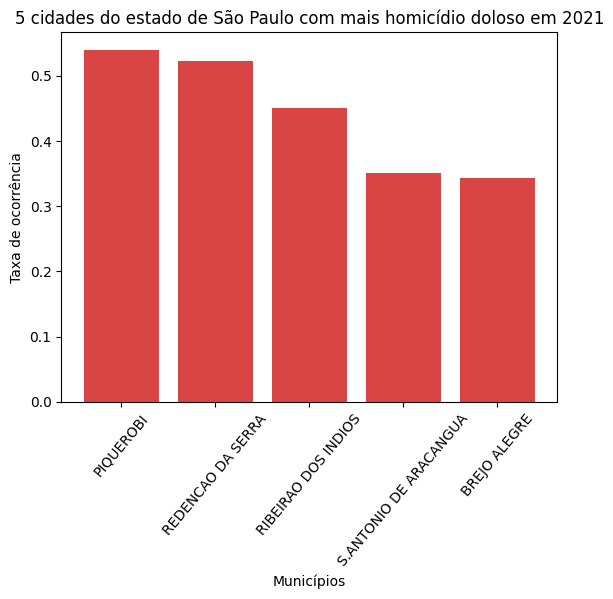

In [99]:
df_ordenado = df_taxa_homicidio_doloso2021_merged.sort_values(by='Taxa ocorrência', ascending=False)

municipios = df_ordenado['MUNICIPIO_CIRCUNSCRICAO'].head()
taxa = df_ordenado['Taxa ocorrência'].head()

plt.bar(municipios, taxa, color='#d94545')

# Configurações do gráfico
plt.xlabel("Municípios")
plt.ylabel("Taxa de ocorrência")
plt.title("5 cidades do estado de São Paulo com mais homicídio doloso em 2021")
plt.xticks(rotation=50)

# Mostra o gráfico na tela
plt.show()

### 2022

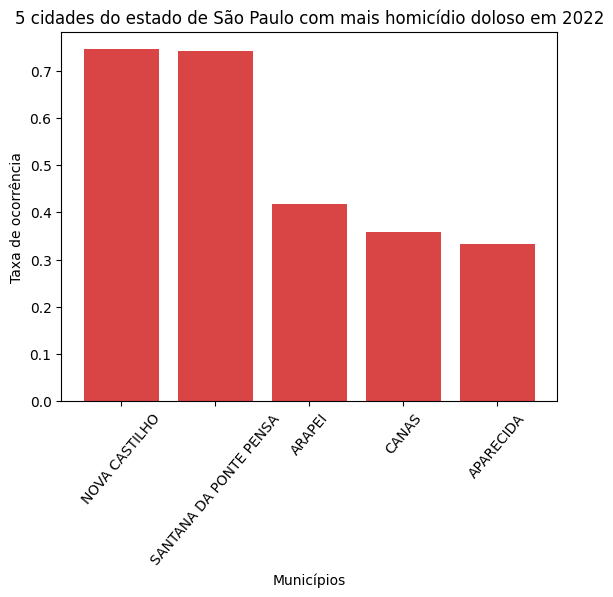

In [100]:
df_ordenado = df_taxa_homicidio_doloso2022_merged.sort_values(by='Taxa ocorrência', ascending=False)

municipios = df_ordenado['MUNICIPIO_CIRCUNSCRICAO'].head()
taxa = df_ordenado['Taxa ocorrência'].head()

plt.bar(municipios, taxa, color='#d94545')

# Configurações do gráfico
plt.xlabel("Municípios")
plt.ylabel("Taxa de ocorrência")
plt.title("5 cidades do estado de São Paulo com mais homicídio doloso em 2022")
plt.xticks(rotation=50)

# Mostra o gráfico na tela
plt.show()

### 2017-2022

In [101]:
df_taxa_homicidio_doloso2017_merged = df_taxa_homicidio_doloso2017_merged.rename(columns={'MUNICIPIO_CIRCUNSCRICAO': 'CIDADE'})
df_taxa_homicidio_doloso2018_merged = df_taxa_homicidio_doloso2018_merged.rename(columns={'MUNICIPIO_CIRCUNSCRICAO': 'CIDADE'})
df_taxa_homicidio_doloso2019_merged = df_taxa_homicidio_doloso2019_merged.rename(columns={'MUNICIPIO_CIRCUNSCRICAO': 'CIDADE'})
df_taxa_homicidio_doloso2020_merged = df_taxa_homicidio_doloso2020_merged.rename(columns={'MUNICIPIO_CIRCUNSCRICAO': 'CIDADE'})
df_taxa_homicidio_doloso2021_merged = df_taxa_homicidio_doloso2021_merged.rename(columns={'MUNICIPIO_CIRCUNSCRICAO': 'CIDADE'})
df_taxa_homicidio_doloso2022_merged = df_taxa_homicidio_doloso2022_merged.rename(columns={'MUNICIPIO_CIRCUNSCRICAO': 'CIDADE'})

In [102]:
# Inicialize um DataFrame vazio para armazenar as somas finais
df_final = pd.DataFrame(columns=['CIDADE'])

# Defina os DataFrames de entrada em uma lista
datasets = [df_taxa_homicidio_doloso2017_merged, df_taxa_homicidio_doloso2018_merged, df_taxa_homicidio_doloso2019_merged,
            df_taxa_homicidio_doloso2020_merged, df_taxa_homicidio_doloso2021_merged, df_taxa_homicidio_doloso2022_merged]

# Para cada DataFrame de entrada
for i, dataset in enumerate(datasets):
    # Agrupe os dados por "Município" e some as ocorrências
    grouped = dataset.groupby('CIDADE')['Ocorrências'].sum().reset_index()

    # Adicione uma nova coluna para identificar o ano do dataset
    grouped['População'] = dataset[f'20{i+17}']  # Assume que os datasets são para os anos 2017, 2018 e 2019, 2020, 2021, 2022

    # Junte o resultado com o DataFrame final, preenchendo valores ausentes com 0
    df_final = df_final.merge(grouped, on='CIDADE', how='outer').fillna(0)

<ipython-input-102-113550971c32>:17: FutureWarning: Passing 'suffixes' which cause duplicate columns {'População_x', 'Ocorrências_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_final = df_final.merge(grouped, on='CIDADE', how='outer').fillna(0)
<ipython-input-102-113550971c32>:17: FutureWarning: Passing 'suffixes' which cause duplicate columns {'População_x', 'Ocorrências_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_final = df_final.merge(grouped, on='CIDADE', how='outer').fillna(0)


In [103]:
df_final.columns = ['CIDADE', '2017_ocorrências', '2017', '2018_ocorrências', '2018', '2019_ocorrências', '2019', '2020_ocorrências', '2020',
                    '2021_ocorrências', '2021', '2022_ocorrências', '2022']

In [104]:
df_final['Total ocorrências'] = df_final['2017_ocorrências'] + df_final['2018_ocorrências'] + df_final['2019_ocorrências'] + df_final['2020_ocorrências'] + df_final['2021_ocorrências'] + df_final['2022_ocorrências']
df_final = df_final.drop(['2017_ocorrências', '2018_ocorrências', '2019_ocorrências', '2020_ocorrências', '2021_ocorrências', '2022_ocorrências'], axis=1)
df_final = df_final.drop(['2017', '2018', '2019', '2020', '2021', '2022'], axis=1)

In [105]:
df_final = pd.merge(df_final, df_estimativa_populacao, left_on='CIDADE', right_on='Cidade', how='inner')
df_final = df_final.drop(['Cidade', '2017', '2018', '2019', '2020', '2021'], axis=1)

In [106]:
df_final['Taxa ocorrência'] = (df_final['Total ocorrências'] / df_final['2022']) * 1000

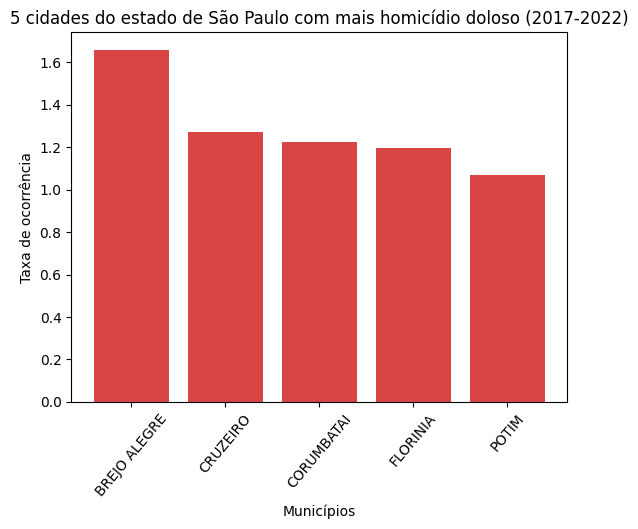

In [107]:
df_ordenado = df_final.sort_values(by='Taxa ocorrência', ascending=False)

municipios = df_ordenado['CIDADE'].head()
taxa = df_ordenado['Taxa ocorrência'].head()

plt.bar(municipios, taxa, color='#d94545')

# Configurações do gráfico
plt.xlabel("Municípios")
plt.ylabel("Taxa de ocorrência")
plt.title("5 cidades do estado de São Paulo com mais homicídio doloso (2017-2022)")
plt.xticks(rotation=50)

# Mostra o gráfico na tela
plt.show()